[[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 12], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 9], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 15], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 12], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 9], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 15], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 12], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 12], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 9, 9], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 15], [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 12, 12], [3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 9], [3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 15], [3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 9, 12], [3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 9, 9], [3, 3, 3, 3, 3, 3, 3, 3

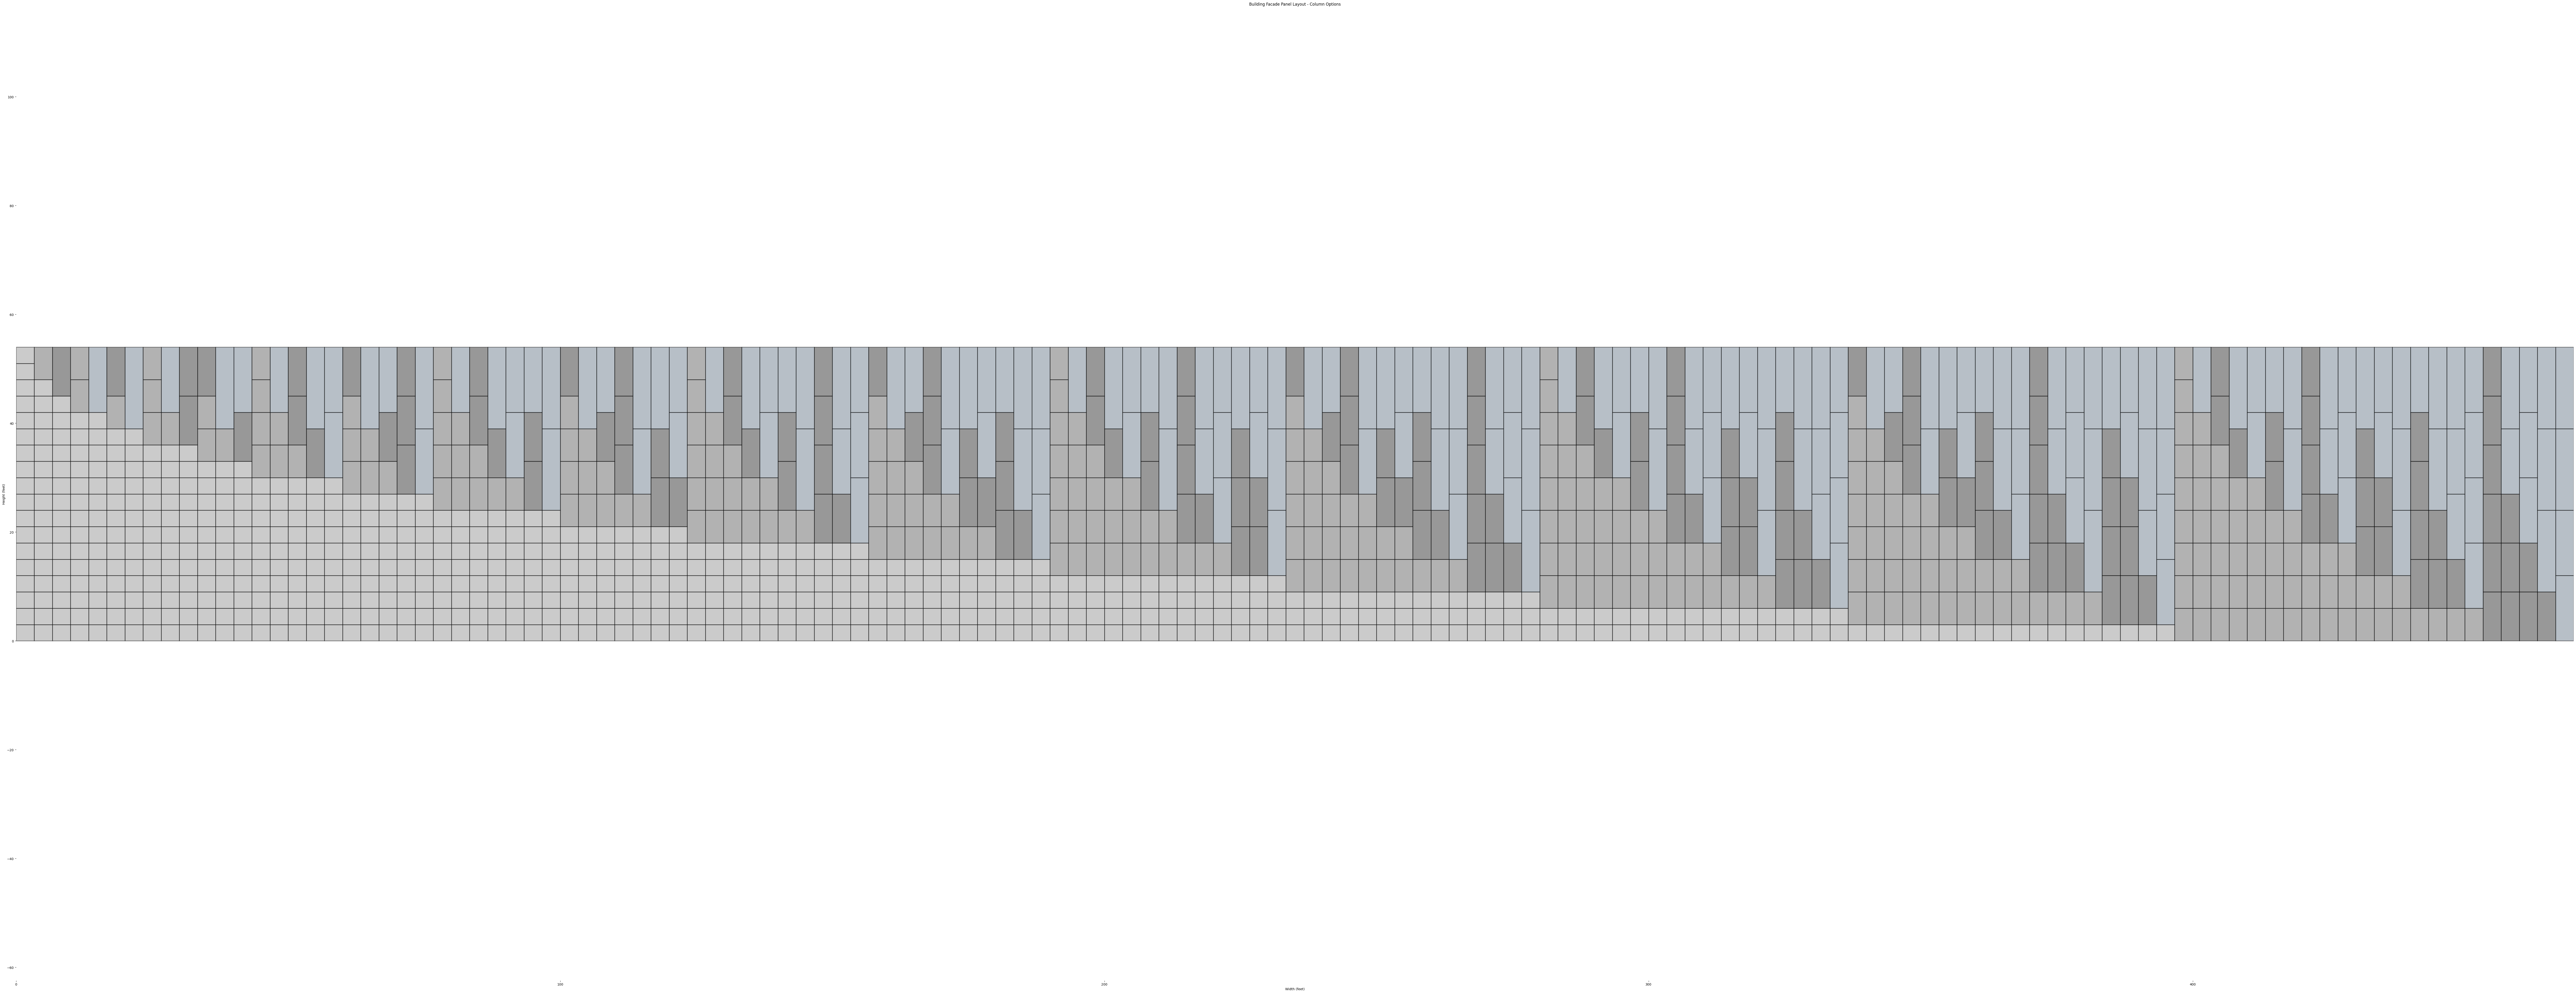

In [504]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors

# CONSTANTS
BLD_HEIGHT = 54
BLD_WIDTH = 140
PNL_WIDTH_MAX = 10 / 3
PNL_WIDTH = 10 / 3
PANEL_WINDOW_HEIGHT = [3, 6, 9, 12, 15]
# VALID_HEIGHTS = {0, 18, 36}


class Solution(object):
    """
    Generate combinations based on panel, window types and buidling height.
    """
    def combinationSum(self, candidates, target_sum):
        result = []
        unique = {}
        candidates = list(set(candidates))
        self.solve(candidates, target_sum, result, unique)
        return result

    def solve(self, candidates, target_sum, result, unique, i=0, current=[]):
        if target_sum == 0:
            temp = [i for i in current]
            temp1 = temp
            temp.sort()
            temp = tuple(temp)
            if temp not in unique:
                unique[temp] = 1
                result.append(temp1)
            return
        if target_sum < 0:
            return
        for x in range(i, len(candidates)):
            current.append(candidates[x])
            self.solve(
                candidates, target_sum - candidates[x], result, unique, i, current
            )
            current.pop(len(current) - 1)


def plot_panel_col_layout(facade_layout, max_height=BLD_HEIGHT):
    """
    Plot the graphic based on building layouts.

    Args:
        facade_layout (list): list of lists or tuple containing panel height for each vertical bay.
        max_height (integer, optional): Building height. Defaults to BLD_HEIGHT.
    """
    # Determine the number of bays
    num_bays = len(facade_layout)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(num_bays, max_height))

    # Check if panel_height is a tuple or list
    if not isinstance(facade_layout, (tuple, list)):
        print(f"Invalid type for panel_height: {type(panel_height)}")
        return

    # Iterate through each bay
    for i, bay in enumerate(facade_layout):
        # Starting height for the first panel in the bay
        current_height = 0

        # Draw each panel
        for height in bay:
            # Define panel color based on the height of the panel
            if height == 3:
                panel_color = (0.6, 0.6, 0.6, 1)
            elif height == 6:
                panel_color = (0.4, 0.4, 0.4, 1)
            elif height == 9:
                panel_color = (0.2, 0.2, 0.2, 1)
            elif height == 12:
                panel_color = "slategray"
            elif height == 15:
                panel_color = "slategray"

            # Draw a rectangle for the panel
            rect = Rectangle(
                (i * PNL_WIDTH, current_height),
                PNL_WIDTH,
                height,
                facecolor=panel_color,
                edgecolor="black",
                linewidth=2,
                alpha=0.5,
            )
            ax.add_patch(rect)

            # Update the current height
            current_height += height

    # Set the x and y axis limits
    plt.axis("equal")
    plt.xlim(0, num_bays * PNL_WIDTH)
    plt.ylim(0, max_height)

    # Set labels
    ax.set_xlabel("Width (feet)")
    ax.set_ylabel("Height (feet)")

    # Set title
    ax.set_title("Building Facade Panel Layout - Column Options")

    # Remove frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

    # # Set up figure size
    # plt.figure(16, 9)

    # Show the plot
    plt.show()


global vertical_bay_opt_0
# Generate combination options based on panel and window types
cobinations = Solution()
vertical_bay_opt_0 = cobinations.combinationSum(PANEL_WINDOW_HEIGHT, BLD_HEIGHT)
print(vertical_bay_opt_0)
print(f"There are {len(vertical_bay_opt_0)} options for the columns.")
# Plot the options for each vertical bay
plot_panel_col_layout(vertical_bay_opt_0)

There are 15 options for the columns.
[[3, 3, 6, 12, 15, 15], [3, 6, 6, 6, 6, 12, 15], [3, 6, 6, 9, 15, 15], [3, 6, 9, 9, 12, 15], [6, 6, 6, 6, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6, 6, 12], [6, 6, 6, 6, 6, 6, 9, 9], [6, 6, 6, 6, 6, 9, 15], [6, 6, 6, 6, 9, 9, 12], [6, 6, 6, 9, 9, 9, 9], [6, 6, 6, 9, 12, 15], [6, 6, 9, 9, 9, 15], [6, 9, 9, 9, 9, 12], [9, 9, 9, 9, 9, 9], [9, 9, 9, 12, 15]]


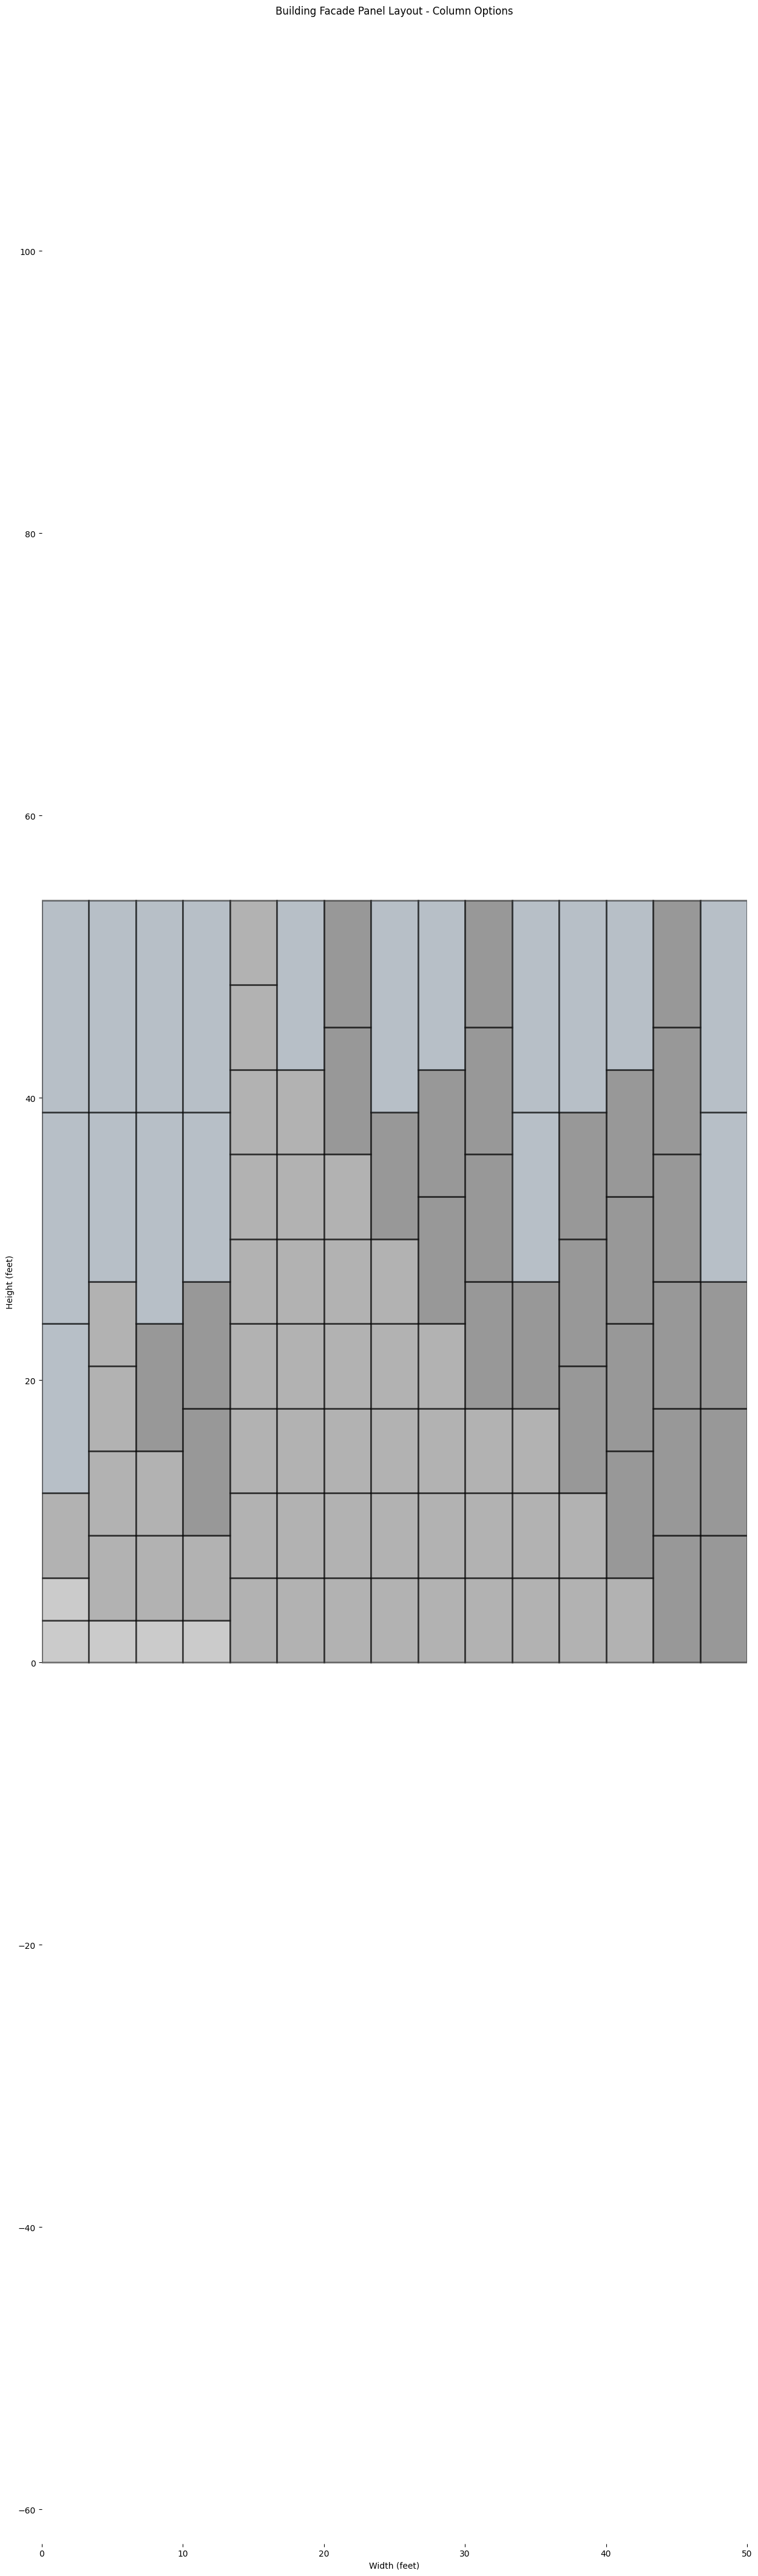

In [505]:
# However, many of these options may not align with the aesthetic preferences favoring 6-foot and 9-foot panels.

# Set up a new list with perferred vertical bay options
vertical_bay_opt_1 = []

# Eliminate invalid options

for vbay in vertical_bay_opt_0:
    # options with no window and no 3' panel
    if (12 not in vbay) and (15 not in vbay) and (3 not in vbay):
        vertical_bay_opt_1.append(vbay)
    # options with one 12' window, no 15' window
    if (vbay.count(12) == 1) and (vbay.count(15) == 0) and (3 not in vbay):
        vertical_bay_opt_1.append(vbay)
    # options with one 12' window, one 15' window, and maximum one 3' panel
    if (vbay.count(12) == 1) and (vbay.count(15) == 1) and (vbay.count(3) <= 1):
        vertical_bay_opt_1.append(vbay)
    # options with one 12' window, two 15' windows, and two 3' panel
    if (vbay.count(12) == 1) and (vbay.count(15) == 2) and (vbay.count(3) == 2):
        vertical_bay_opt_1.append(vbay)
    # options with one 15' window and no 3' panel
    if (vbay.count(15) == 1) and (3 not in vbay) and (12 not in vbay):
        vertical_bay_opt_1.append(vbay)
    # options with two 15' winodws and one 3' panel
    if (vbay.count(15) == 2) and (vbay.count(3) == 1) and (12 not in vbay):
        vertical_bay_opt_1.append(vbay)

# Remove duplicates
from collections import OrderedDict

# Convert each inner list to a tuple, use OrderedDict to remove duplicates, and convert back to list
vertical_bay_opt_1 = list(OrderedDict.fromkeys(tuple(item) for item in vertical_bay_opt_1))

# Convert back the tuples to lists
vertical_bay_opt_1 = [list(item) for item in vertical_bay_opt_1]

print(f"There are {len(vertical_bay_opt_1)} options for the columns.")
print(vertical_bay_opt_1)
# Show panel options after the elimination process.
plot_panel_col_layout(vertical_bay_opt_1, BLD_HEIGHT)

There are 3 ways to arrange the panels and windows.


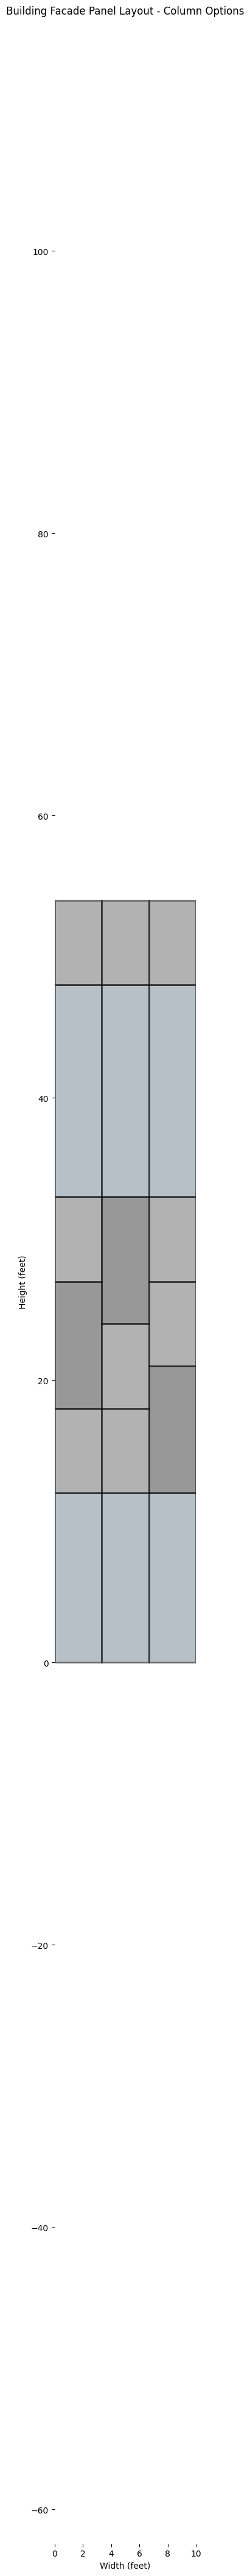

In [506]:
from itertools import permutations

def filter_vbay(vbay):
    """
    This function produces unique permutations for each vertical bay and filters them.
    It ensures a 12-unit window is at elevation 0 and a 15-unit window is at elevation 15 or 33.

    Args:
        vbay (tuple): tuple includes all panel heights for that vertical bay
    """
    perm = list(set(permutations(vbay)))

    # Valid heights for the 15-unit window (cumulative height before the 15-unit window)
    valid_heights_for_15 = {15, 33}

    # Filter permutations
    filtered_perms = []
    for vbay_perm in perm:
        # check for options without windows
        if (12 not in vbay_perm) and (15 not in vbay_perm):
            filtered_perms.append(vbay_perm)
        # one 12' window and no 15' window
        if (12 in vbay_perm) and (15 not in vbay_perm):
            if vbay_perm[0] == 12:
                filtered_perms.append(vbay_perm)
        # one 12' window and one 15' window
        if (12 in vbay_perm) and (vbay_perm.count(15)==1):
            if (vbay_perm[0] == 12):
                if (vbay_perm[1] == 3) and (vbay_perm[2] == 15):
                    filtered_perms.append(vbay_perm)
                elif (3 not in vbay_perm):
                    for i in range(len(vbay_perm)):
                        cumulative_height = sum(vbay_perm[:i])
                        if (cumulative_height == 33) and vbay_perm[i]==15:
                            filtered_perms.append(vbay_perm)
        # one 12' window and two 15' window
        if (12 in vbay_perm) and (vbay_perm.count(15)==2):
            if (vbay_perm[0] == 12):
                if (vbay_perm[1] == 3) and (vbay_perm[2] == 15) and (vbay_perm[3] == 3) and (vbay_perm[4] == 15):
                    filtered_perms.append(vbay_perm)
        # two 15' windows and no 12' window:
        if (vbay_perm.count(15)==2) and (12 not in vbay_perm):
            for i in range(len(vbay_perm)-3):
                cumulative_height = sum(vbay_perm[:i + 1])
                if (cumulative_height == 15) and (vbay_perm[i+1]==15) and (vbay_perm[i+2]==3) and (vbay_perm[i+3]==15):
                    filtered_perms.append(vbay_perm)
        # Check for one 15' window and no 12' window
        if (vbay_perm.count(15) == 1) and (12 not in vbay_perm):
            for i in range(len(vbay_perm) - 1):
                cumulative_height = sum(vbay_perm[:i])
                # Check if the cumulative height before the 15' panel is either 15' or 33'
                if cumulative_height in {15, 33} and vbay_perm[i] == 15:
                    filtered_perms.append(vbay_perm)

    print(f"There are {len(filtered_perms)} ways to arrange the panels and windows.")
    return filtered_perms

# test plot and see if the filter works correctly
plot_panel_col_layout(filter_vbay(vertical_bay_opt_1[-5]), BLD_HEIGHT)

There are 1 ways to arrange the panels and windows.
There are 1 ways to arrange the panels and windows.
There are 2 ways to arrange the panels and windows.
There are 3 ways to arrange the panels and windows.
There are 1 ways to arrange the panels and windows.
There are 1 ways to arrange the panels and windows.
There are 28 ways to arrange the panels and windows.
There are 7 ways to arrange the panels and windows.
There are 15 ways to arrange the panels and windows.
There are 35 ways to arrange the panels and windows.
There are 3 ways to arrange the panels and windows.
There are 10 ways to arrange the panels and windows.
There are 5 ways to arrange the panels and windows.
There are 1 ways to arrange the panels and windows.
There are 0 ways to arrange the panels and windows.
[(12, 3, 15, 3, 15, 6), (12, 3, 15, 6, 6, 6, 6), (6, 9, 15, 3, 15, 6), (9, 6, 15, 3, 15, 6), (12, 3, 15, 9, 9, 6), (12, 3, 15, 6, 9, 9), (12, 3, 15, 9, 6, 9), (6, 6, 6, 6, 6, 6, 6, 6, 6), (12, 6, 6, 6, 6, 6, 6, 6), (

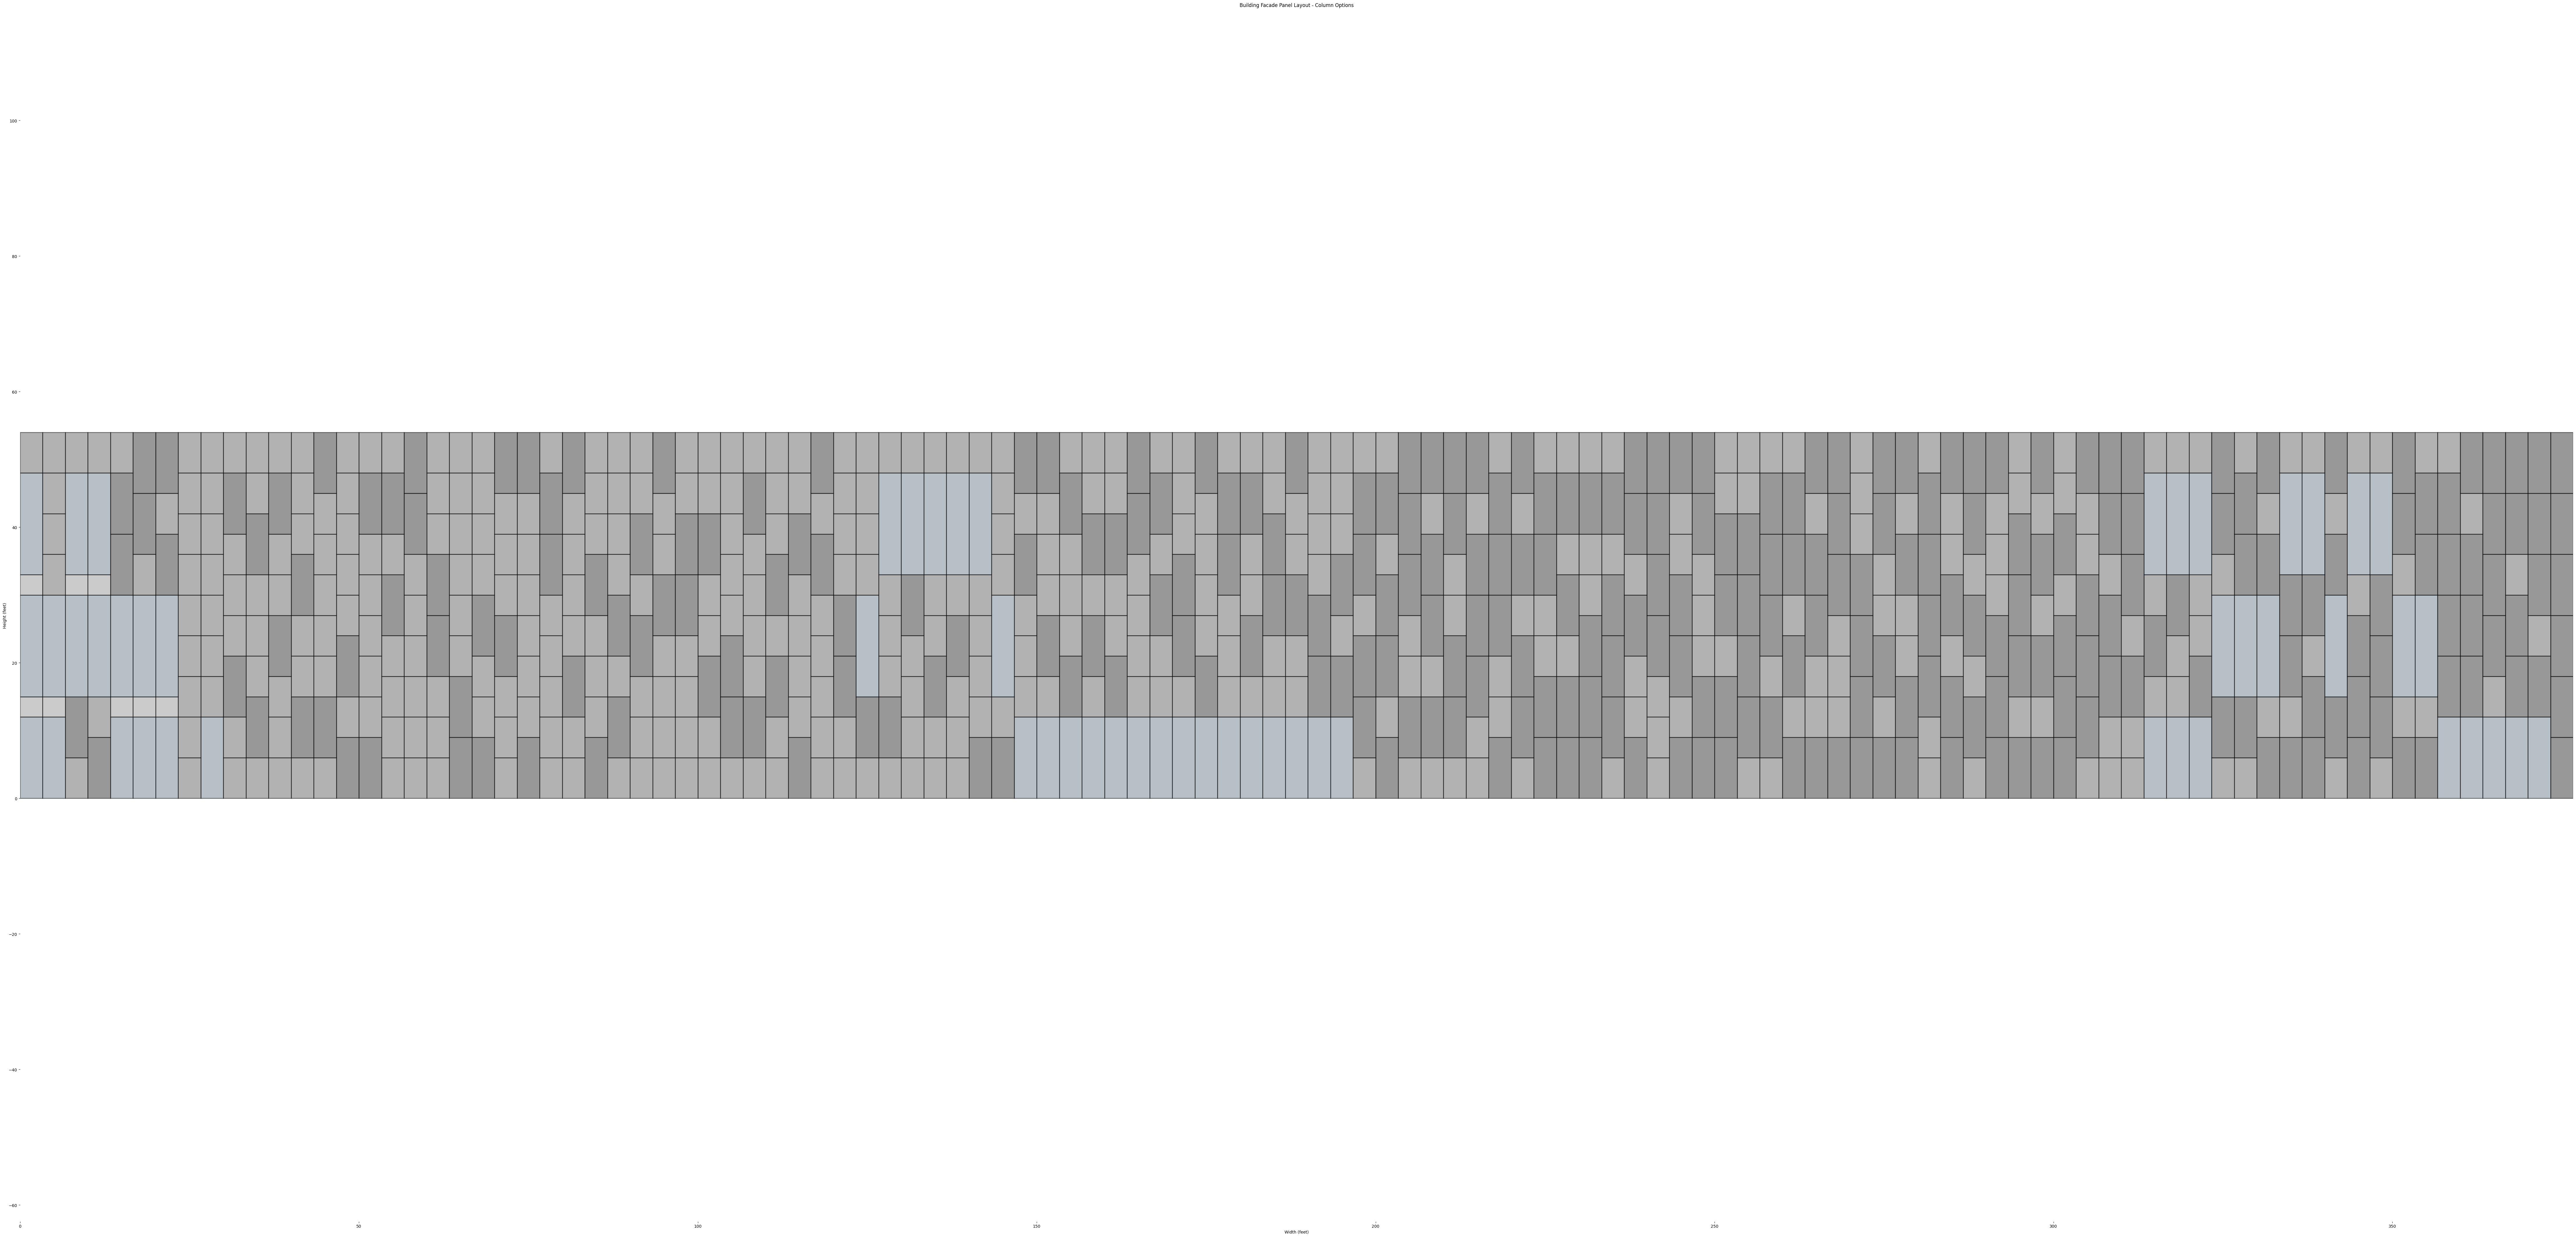

In [507]:
# Add all the filered options into one set

vertical_bay_opt_2 = []
for vbay in vertical_bay_opt_1:
    filtered_vbay_opt = filter_vbay(vbay)
    for vbay_opt in filtered_vbay_opt:
        vertical_bay_opt_2.append(vbay_opt)

print(vertical_bay_opt_2)
print(f"There are total of {len(vertical_bay_opt_2)} options.")

plot_panel_col_layout(vertical_bay_opt_2, BLD_HEIGHT)

There are 48 bays with windows.
There are 65 bays of solid panels


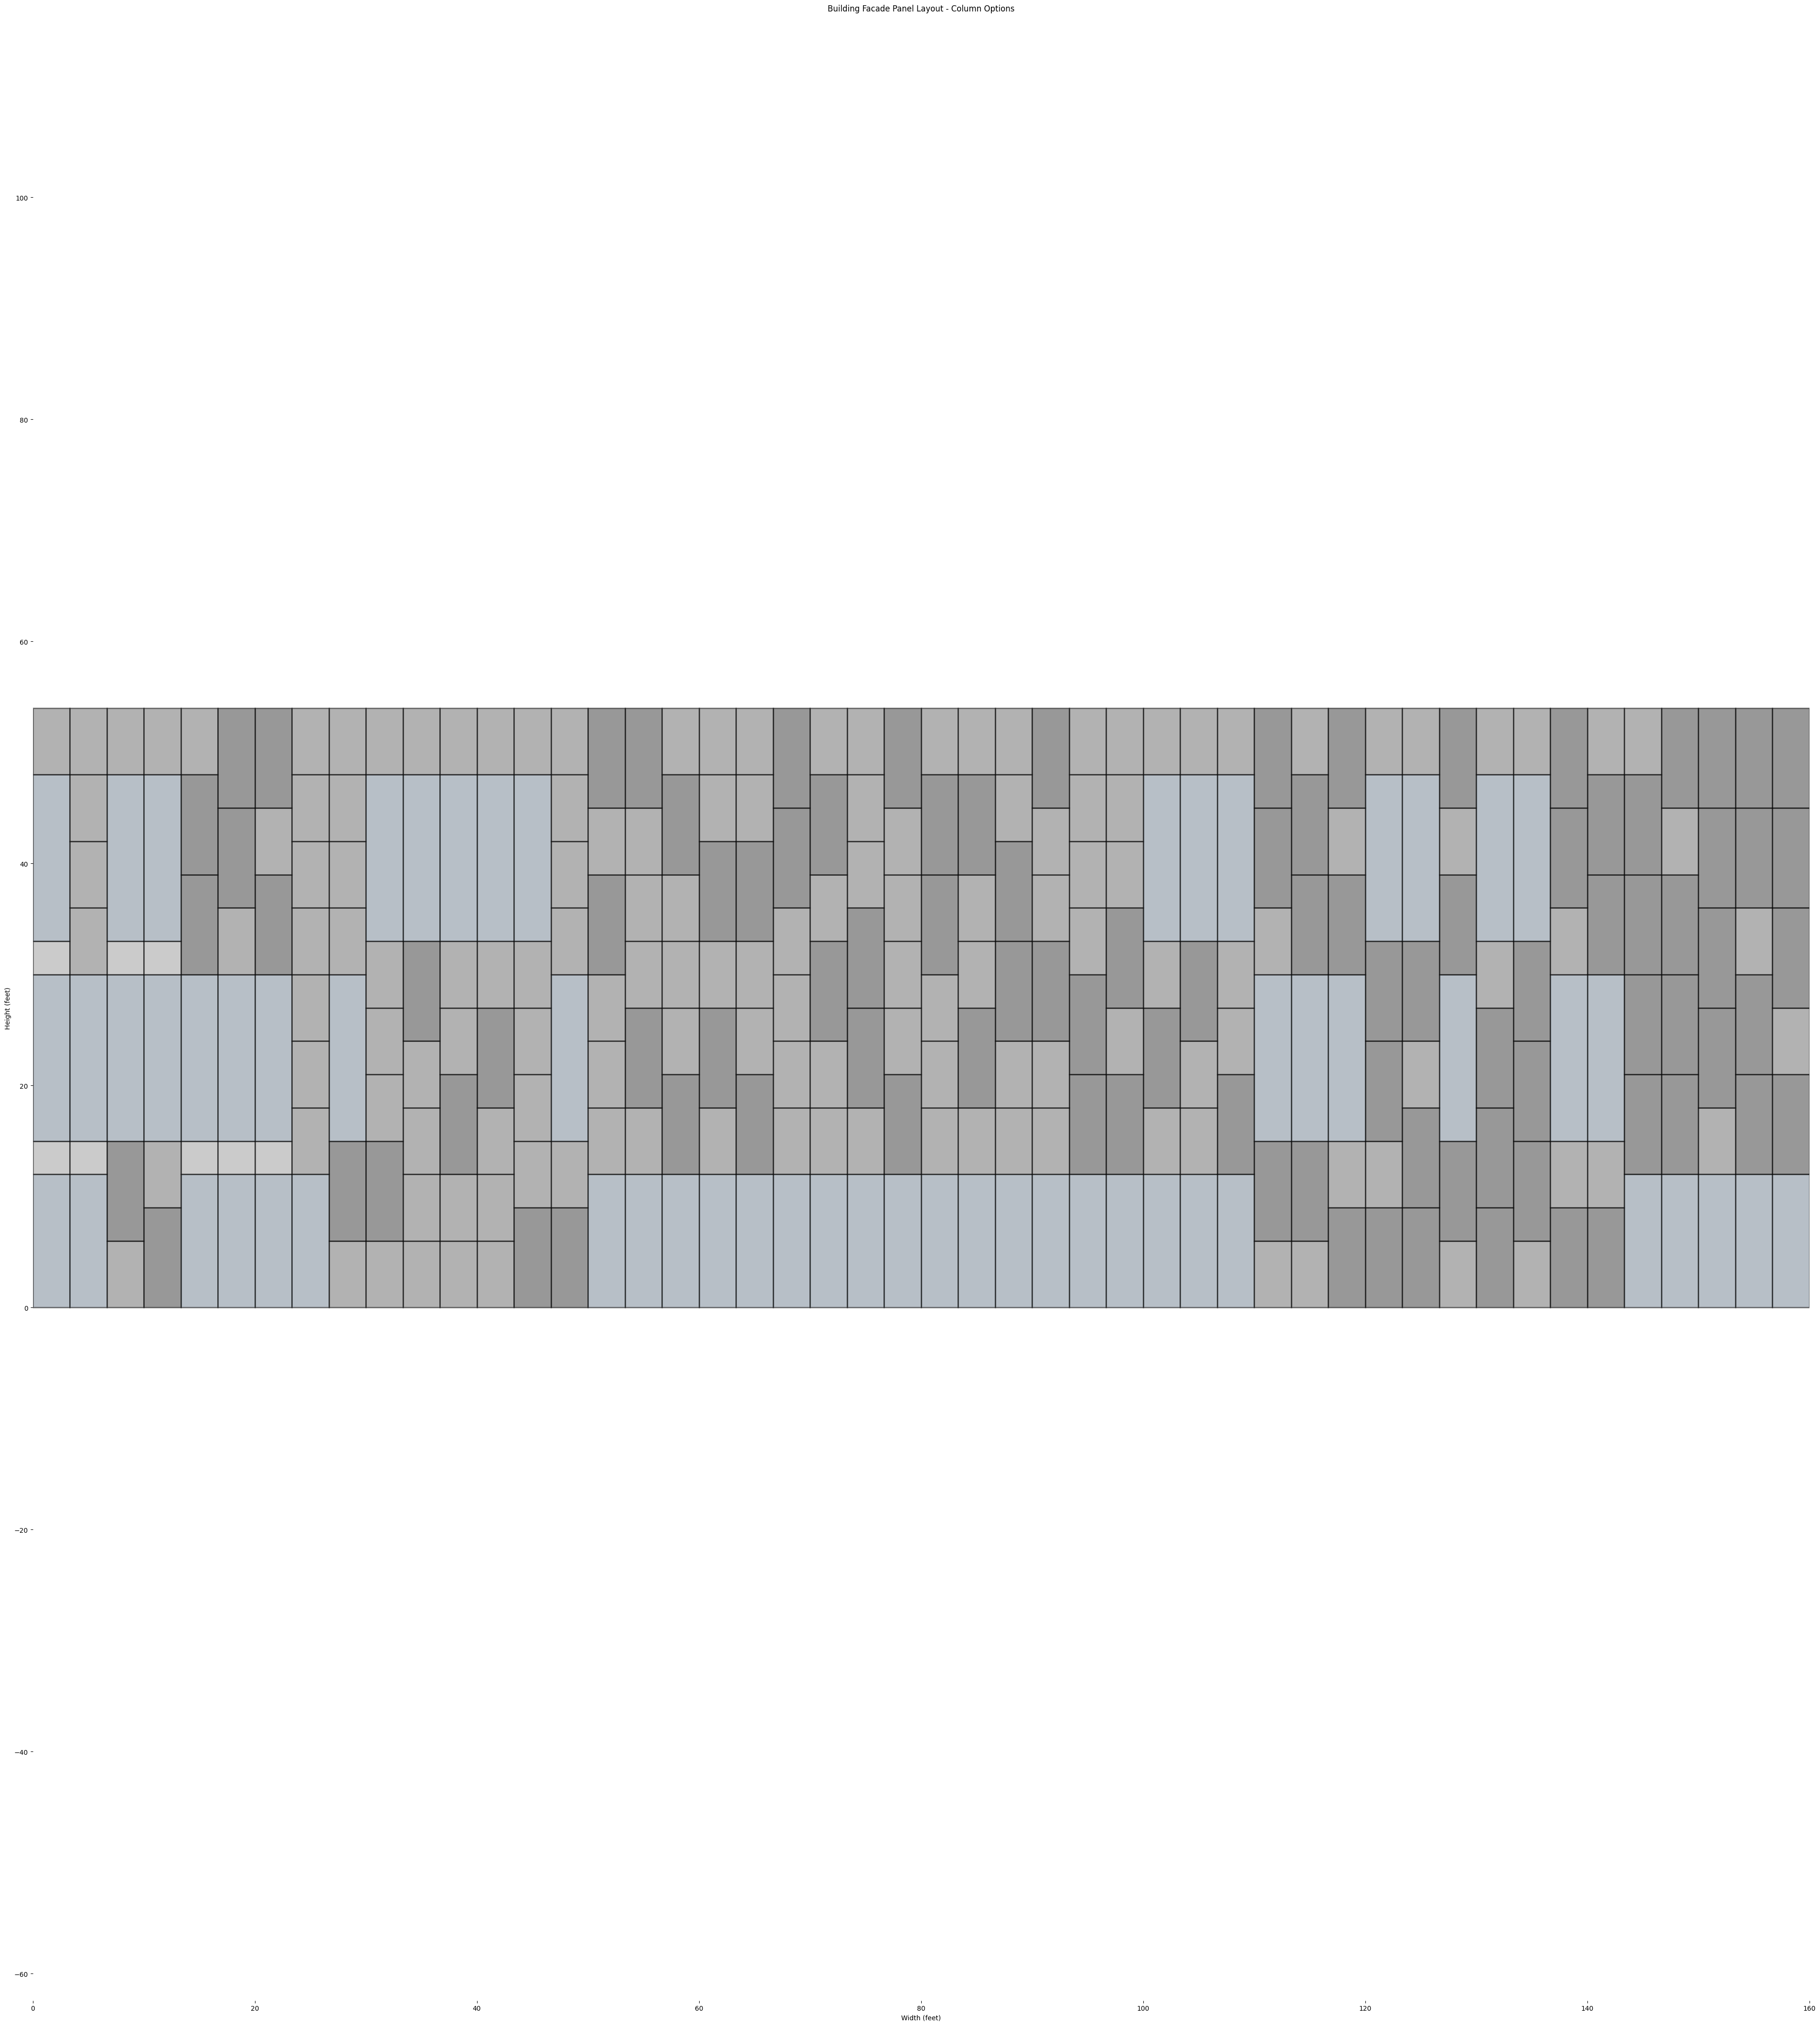

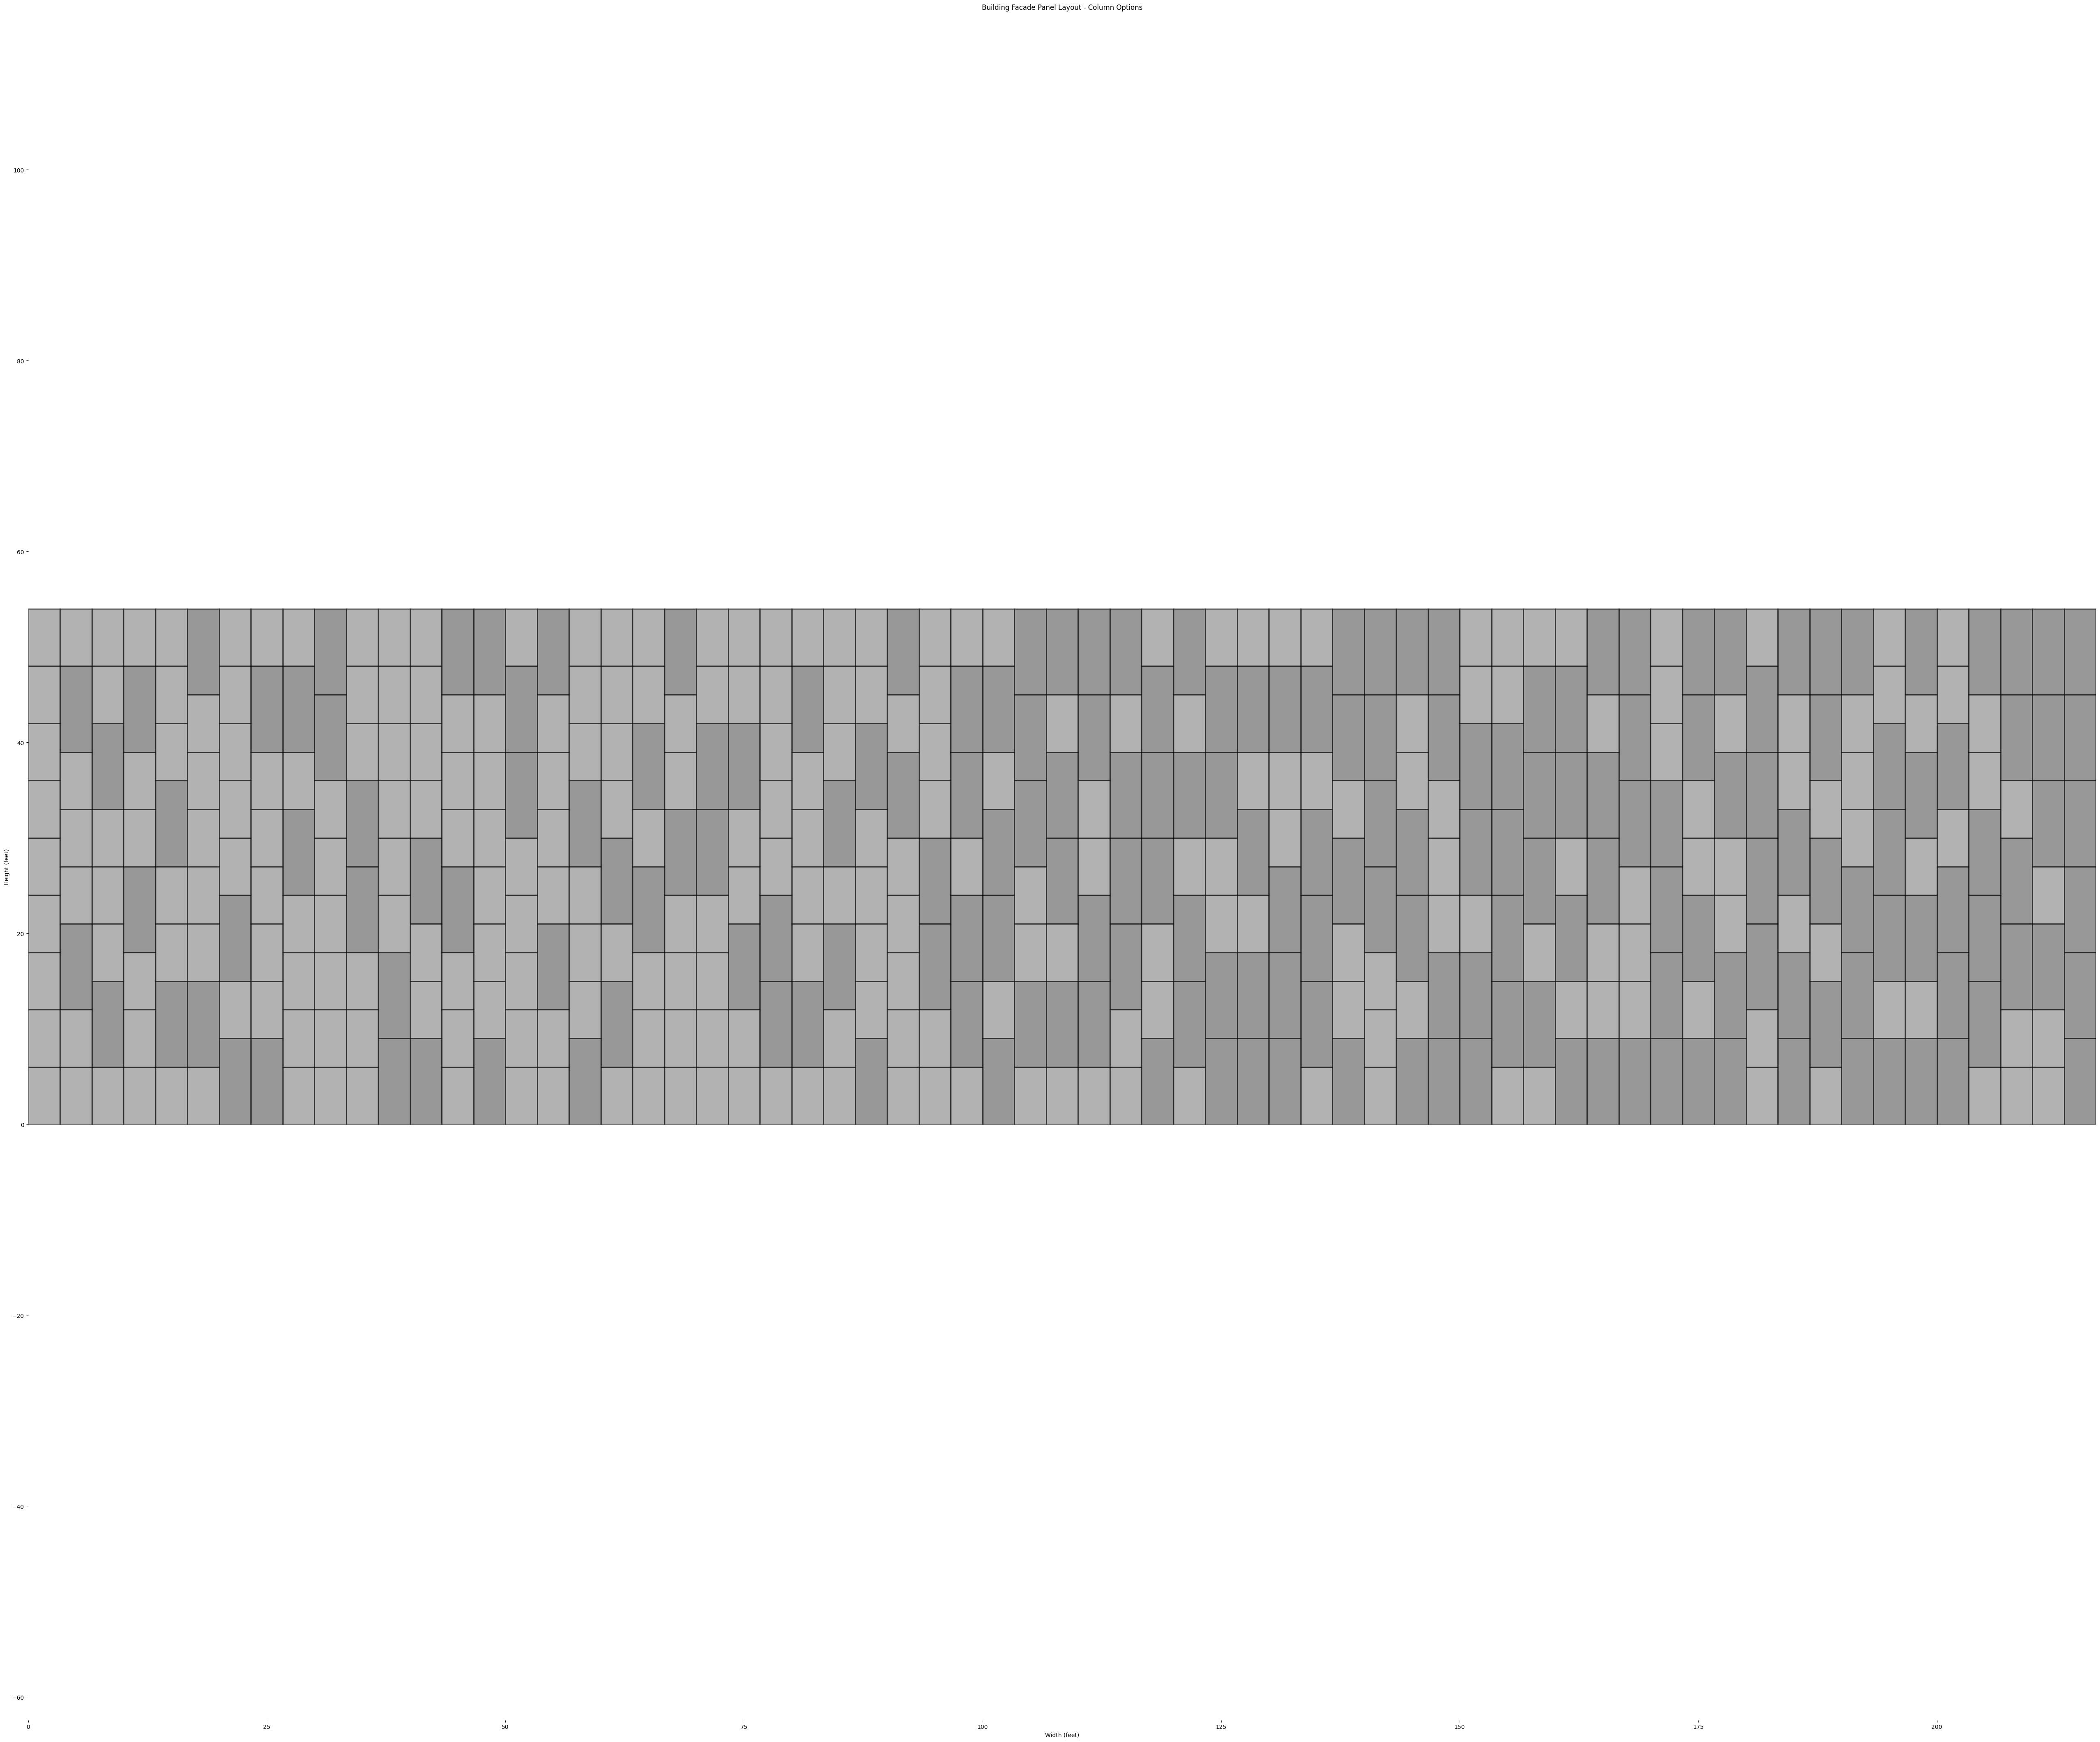

[(6, 6, 6, 6, 6, 6, 6, 6, 6), (6, 6, 9, 6, 6, 6, 9, 6), (6, 9, 6, 6, 6, 9, 6, 6), (6, 6, 6, 9, 6, 6, 9, 6), (6, 9, 6, 6, 9, 6, 6, 6), (6, 9, 6, 6, 6, 6, 6, 9), (9, 6, 9, 6, 6, 6, 6, 6), (9, 6, 6, 6, 6, 6, 9, 6), (6, 6, 6, 6, 9, 6, 9, 6), (6, 6, 6, 6, 6, 6, 9, 9), (6, 6, 6, 9, 9, 6, 6, 6), (9, 9, 6, 6, 6, 6, 6, 6), (9, 6, 6, 9, 6, 6, 6, 6), (6, 6, 6, 9, 6, 6, 6, 9), (9, 6, 6, 6, 6, 6, 6, 9), (6, 6, 6, 6, 6, 9, 9, 6), (6, 6, 9, 6, 6, 6, 6, 9), (9, 6, 6, 6, 9, 6, 6, 6), (6, 9, 6, 9, 6, 6, 6, 6), (6, 6, 6, 9, 6, 9, 6, 6), (6, 6, 6, 6, 9, 6, 6, 9), (6, 6, 6, 6, 9, 9, 6, 6), (6, 6, 9, 6, 6, 9, 6, 6), (6, 9, 9, 6, 6, 6, 6, 6), (6, 9, 6, 6, 6, 6, 9, 6), (6, 6, 9, 6, 9, 6, 6, 6), (9, 6, 6, 6, 6, 9, 6, 6), (6, 6, 6, 6, 6, 9, 6, 9), (6, 6, 9, 9, 6, 6, 6, 6), (6, 9, 9, 6, 9, 9, 6), (9, 6, 9, 9, 6, 9, 6), (6, 9, 6, 6, 9, 9, 9), (6, 9, 6, 9, 9, 6, 9), (6, 9, 9, 6, 6, 9, 9), (6, 6, 9, 9, 9, 6, 9), (9, 6, 6, 9, 9, 9, 6), (6, 9, 9, 6, 9, 6, 9), (9, 9, 6, 6, 9, 9, 6), (9, 9, 6, 9, 6, 9, 6), (9, 9, 9, 6,

In [508]:
# vertical_bay_opt_2
# Separate the vertical bays into two lists, one with windows and one without window.
vertical_bay_window = []
vertical_bay_solid = []
for vbay in vertical_bay_opt_2:
    if 12 in vbay or 15 in vbay:
        vertical_bay_window.append(vbay)
    else:
        vertical_bay_solid.append(vbay)

print(f"There are {len(vertical_bay_window)} bays with windows.")
print(f"There are {len(vertical_bay_solid)} bays of solid panels")

plot_panel_col_layout(vertical_bay_window, BLD_HEIGHT)
plot_panel_col_layout(vertical_bay_solid, BLD_HEIGHT)
print(vertical_bay_solid)

In [509]:
# Separate bays with windows into separte lists based on window location
vertical_bay_window_1 = []
vertical_bay_window_2 = []
vertical_bay_window_3 = []
vertical_bay_window_1_2 = []
vertical_bay_window_1_3 = []
vertical_bay_window_2_3 = []
vertical_bay_window_1_2_3 = []
for vbay in vertical_bay_window:
    if (12 in vbay) and (15 not in vbay):
        vertical_bay_window_1.append(vbay)
    if (12 in vbay) and (vbay.count(15) == 1):
        if vbay[-2] == 15:
            vertical_bay_window_1_3.append(vbay)
        else:
            vertical_bay_window_1_2.append(vbay)
    if (12 in vbay) and (vbay.count(15) == 2):
        vertical_bay_window_1_2_3.append(vbay)
    if (12 not in vbay) and (vbay.count(15) == 1):
        if vbay[-2] == 15:
            vertical_bay_window_3.append(vbay)
        else:
            vertical_bay_window_2.append(vbay)
    if (12 not in vbay) and (vbay.count(15) == 2):
        vertical_bay_window_2_3.append(vbay)

print(f"There {len(vertical_bay_window_1)} with window on Level 1.")
print(f"There {len(vertical_bay_window_2)} with window on Level 2.")
print(f"There {len(vertical_bay_window_3)} with window on Level 3.")
print(f"There {len(vertical_bay_window_1_2)} with window on Level 1 & 2.")
print(f"There {len(vertical_bay_window_1_3)} with window on Level 1 & 3.")
print(f"There {len(vertical_bay_window_2_3)} with window on Level 2 & 3.")
print(f"There {len(vertical_bay_window_1_2_3)} with window on Level 1, 2 & 3.")
# plot_panel_col_layout(vertical_bay_window_1, BLD_HEIGHT)
# plot_panel_col_layout(vertical_bay_window_2, BLD_HEIGHT)
# plot_panel_col_layout(vertical_bay_window_3, BLD_HEIGHT)
# plot_panel_col_layout(vertical_bay_window_1_2, BLD_HEIGHT)
# plot_panel_col_layout(vertical_bay_window_1_3, BLD_HEIGHT)
# plot_panel_col_layout(vertical_bay_window_2_3, BLD_HEIGHT)
# plot_panel_col_layout(vertical_bay_window_1_2_3, BLD_HEIGHT)


There 21 with window on Level 1.
There 8 with window on Level 2.
There 9 with window on Level 3.
There 4 with window on Level 1 & 2.
There 3 with window on Level 1 & 3.
There 2 with window on Level 2 & 3.
There 1 with window on Level 1, 2 & 3.


In [510]:
# Calculate numbers of window requried at each level. 

import math
total_area = BLD_HEIGHT * BLD_WIDTH

total_glazing_min = total_area *0.35
total_glazing_max = total_area *0.40
print(f"Total area is {total_area}")
print(f"Total glazing range is {total_glazing_min} to {total_glazing_max}")

total_area_1 = BLD_WIDTH * 15
total_glazing_min_1 = total_area_1 *0.35
total_glazing_max_1 = total_area_1 *0.40
total_window_min_1 = math.ceil(total_glazing_min_1/(40/12*12))
total_window_max_1 = math.floor(total_glazing_max_1/(40/12*12))
print(f"Total area at level 1 is {total_area_1}")
print(f"Total glazing range at level 1 is {total_glazing_min_1} to {total_glazing_max_1}")
print(f"Total window numbers requred at Level 1 are {total_window_min_1} to {total_window_max_1}")


total_area_2 = BLD_WIDTH * 18
total_glazing_min_2 = total_area_2 *0.35
total_glazing_max_2 = total_area_2 *0.40
total_window_min_2 = math.ceil(total_glazing_min_2/(40/12*15))
total_window_max_2 = math.floor(total_glazing_max_2/(40/12*15))
print(f"Total area at level 2 or 3 is {total_area_2}")
print(f"Total glazing range at level 2 or 3 is {total_glazing_min_2} to {total_glazing_max_2}")
print(f"Total window numbers requred at Level 2 or 3 are {total_window_min_2} to {total_window_max_2}")


Total area is 7560
Total glazing range is 2646.0 to 3024.0
Total area at level 1 is 2100
Total glazing range at level 1 is 735.0 to 840.0
Total window numbers requred at Level 1 are 19 to 21
Total area at level 2 or 3 is 2520
Total glazing range at level 2 or 3 is 882.0 to 1008.0
Total window numbers requred at Level 2 or 3 are 18 to 20


[(12, 3, 15, 3, 15, 6), (12, 6, 9, 9, 6, 6, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6)]
[(12, 6, 9, 9, 6, 6, 6)]
[(12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6)]
42


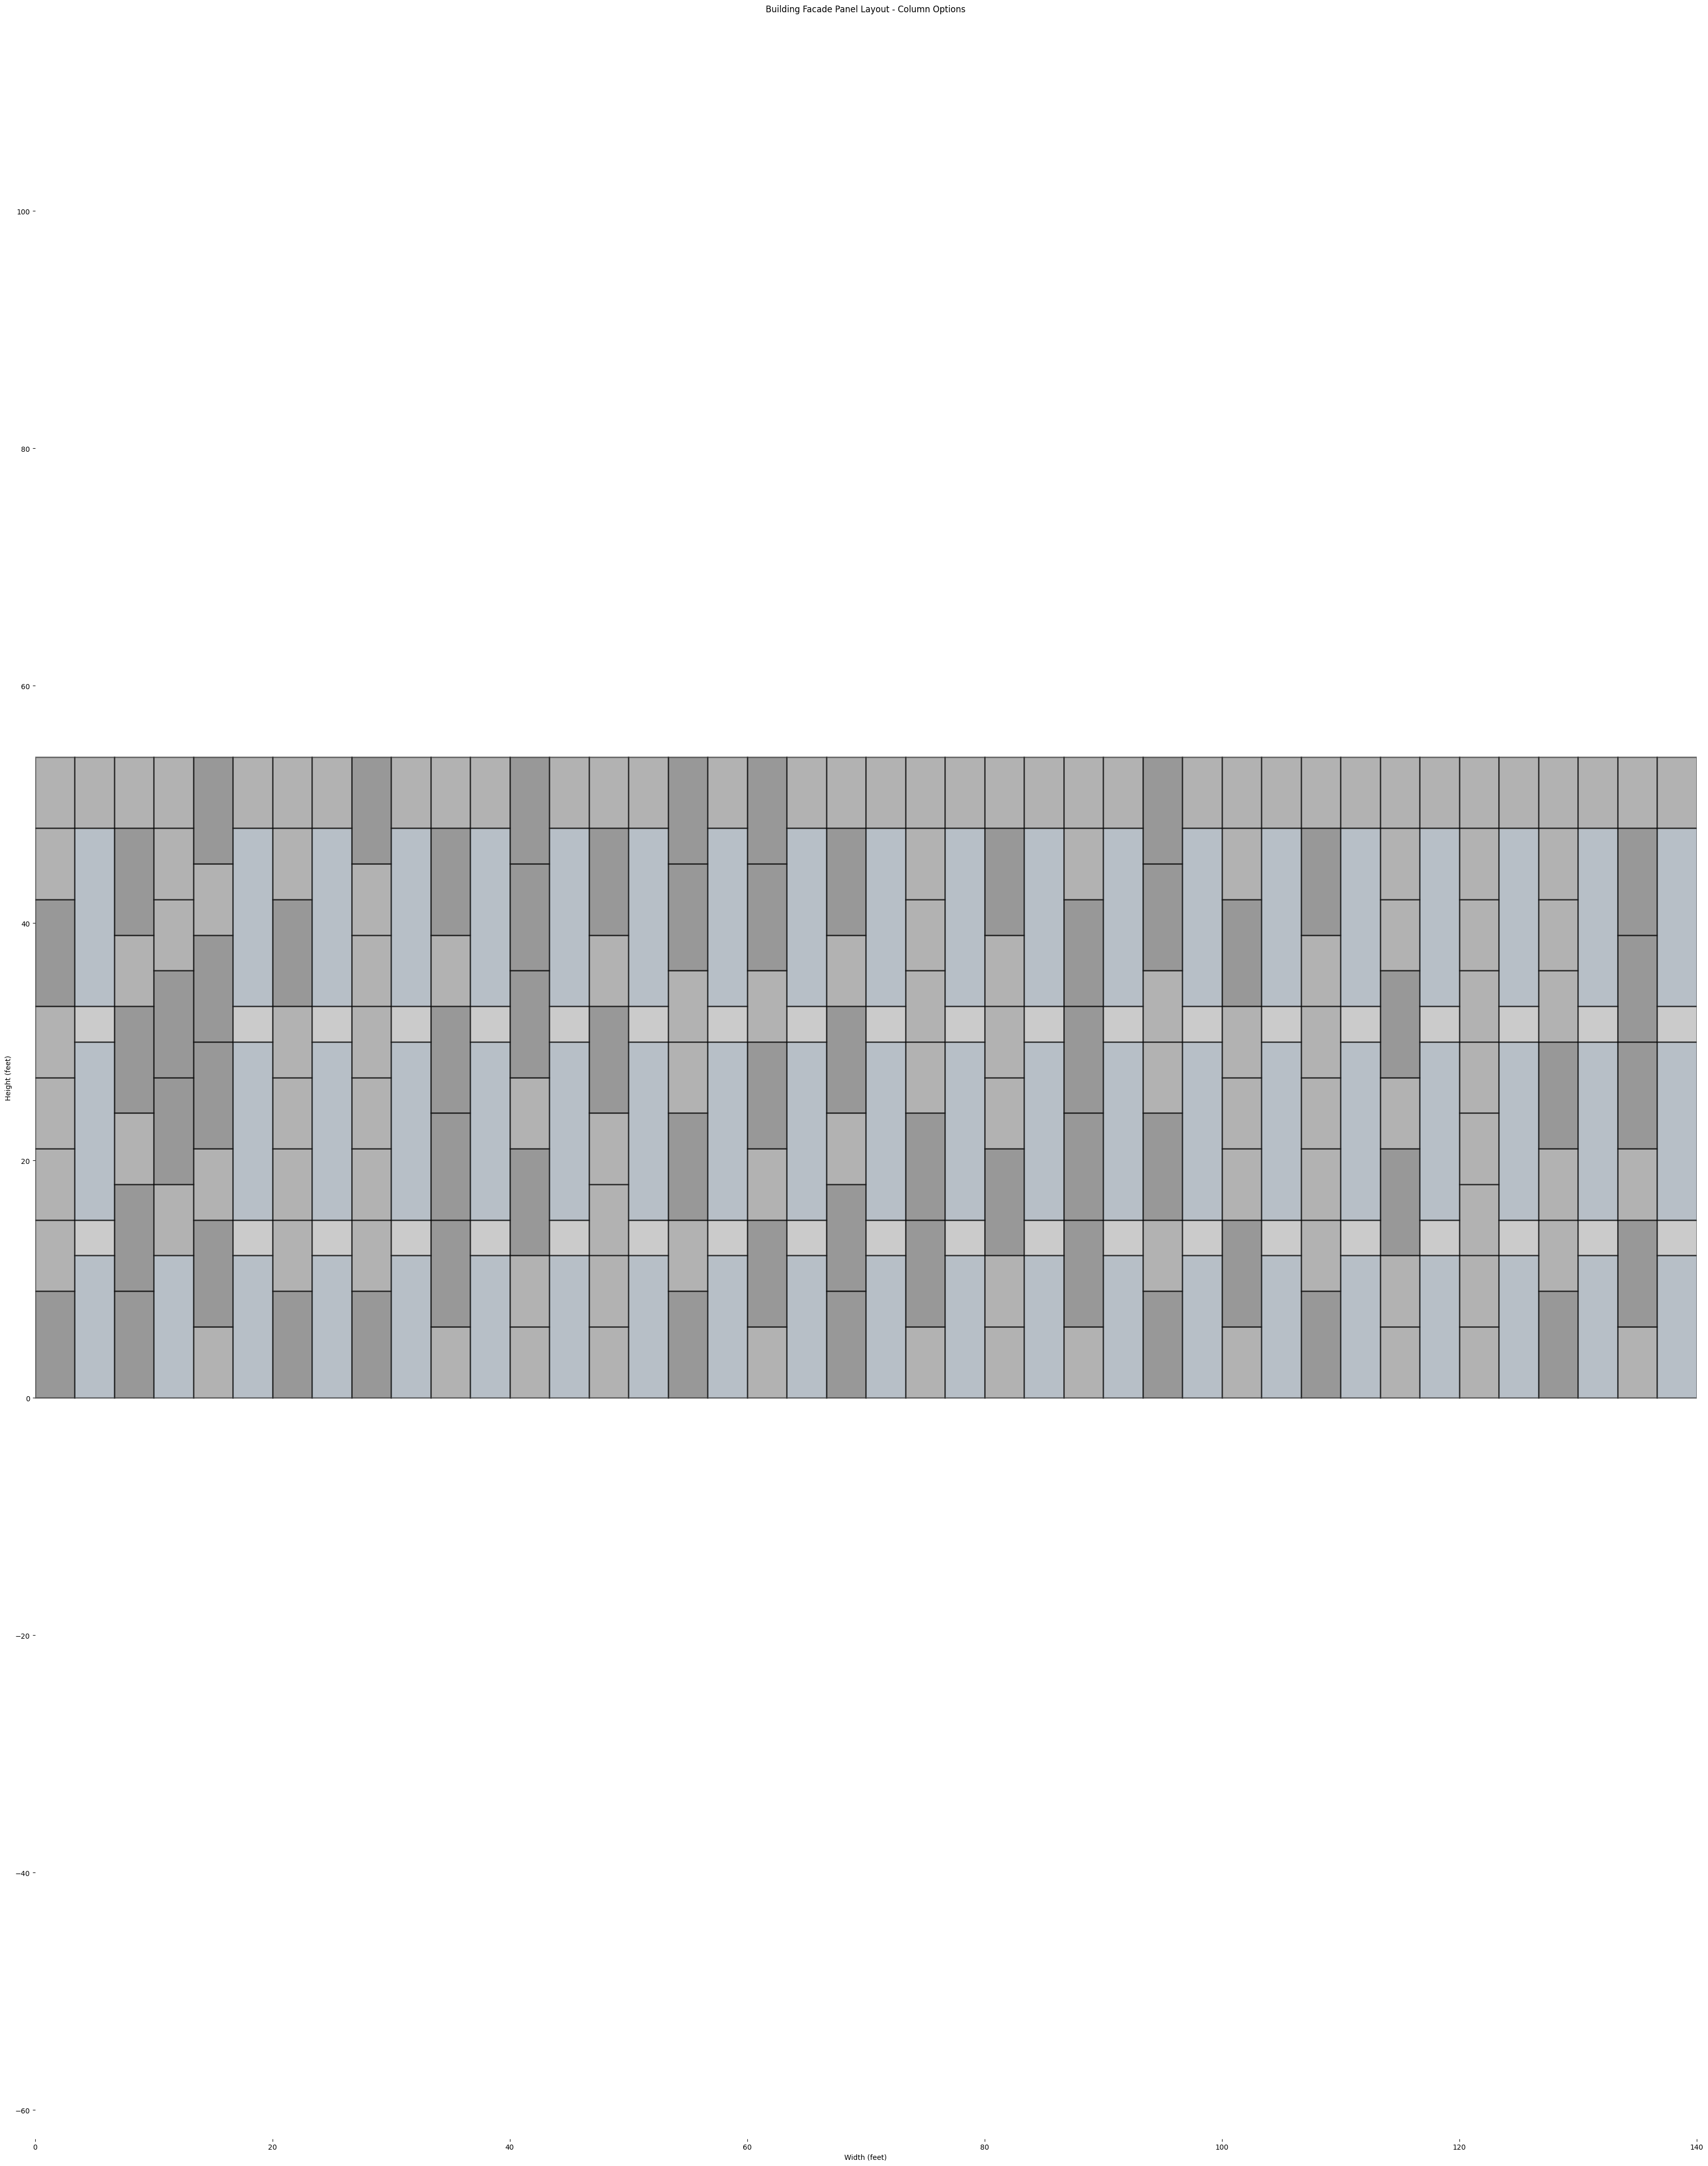

In [511]:
# panel layout type A

import random

# Bay options
# vertical_bay_window_1 # Options with a window on level 1
# vertical_bay_window_1_2_3 # Options with windows on levels 2 and 3
# vertical_bay_solid # All-solid options

# Select bays based on criteria
selected_level_1_windows = [random.choice(vertical_bay_window_1)]
selected_level_2_3_windows = vertical_bay_window_1_2_3 * 20

# Combine and shuffle to create a random distribution
combined_options = selected_level_1_windows + selected_level_2_3_windows
random.shuffle(combined_options)

# Create facade layout
facade_layout_A = []

for i in range(21):
    solid_option = random.choice(vertical_bay_solid)
    facade_layout_A.append(solid_option)
    facade_layout_A.append(combined_options[i])

print(combined_options)
print(selected_level_1_windows)
print(selected_level_2_3_windows)
print(len(facade_layout_A))
plot_panel_col_layout(facade_layout_A)

42
[(6, 9, 9, 6, 9, 9, 6), (12, 9, 6, 6, 15, 6), (6, 9, 15, 6, 6, 6, 6), (12, 9, 6, 6, 15, 6), (6, 9, 15, 6, 6, 6, 6), (12, 9, 6, 6, 15, 6), (9, 6, 15, 6, 9, 9), (12, 6, 6, 9, 15, 6), (6, 9, 15, 9, 9, 6), (12, 6, 6, 9, 15, 6), (9, 6, 15, 6, 9, 9), (12, 6, 6, 9, 15, 6), (6, 9, 15, 9, 9, 6), (12, 9, 6, 6, 15, 6), (6, 9, 15, 6, 9, 9), (12, 9, 6, 6, 15, 6), (6, 9, 15, 9, 6, 9), (12, 9, 6, 6, 15, 6), (6, 9, 15, 6, 6, 6, 6), (12, 6, 9, 6, 15, 6), (6, 9, 15, 9, 9, 6), (12, 6, 9, 6, 15, 6), (6, 9, 15, 6, 9, 9), (12, 9, 6, 6, 15, 6), (9, 6, 15, 6, 6, 6, 6), (12, 6, 9, 6, 15, 6), (9, 6, 15, 9, 6, 9), (12, 6, 9, 6, 15, 6), (6, 9, 15, 6, 6, 6, 6), (12, 9, 6, 6, 15, 6), (6, 9, 15, 6, 9, 9), (12, 6, 9, 6, 15, 6), (6, 9, 15, 9, 6, 9), (12, 6, 6, 9, 15, 6), (6, 9, 15, 6, 9, 9), (12, 6, 6, 9, 15, 6), (9, 6, 15, 6, 9, 9), (12, 6, 6, 9, 15, 6), (6, 9, 15, 9, 9, 6), (12, 6, 6, 9, 15, 6), (6, 9, 15, 9, 6, 9), (12, 6, 6, 6, 6, 6, 6, 6)]



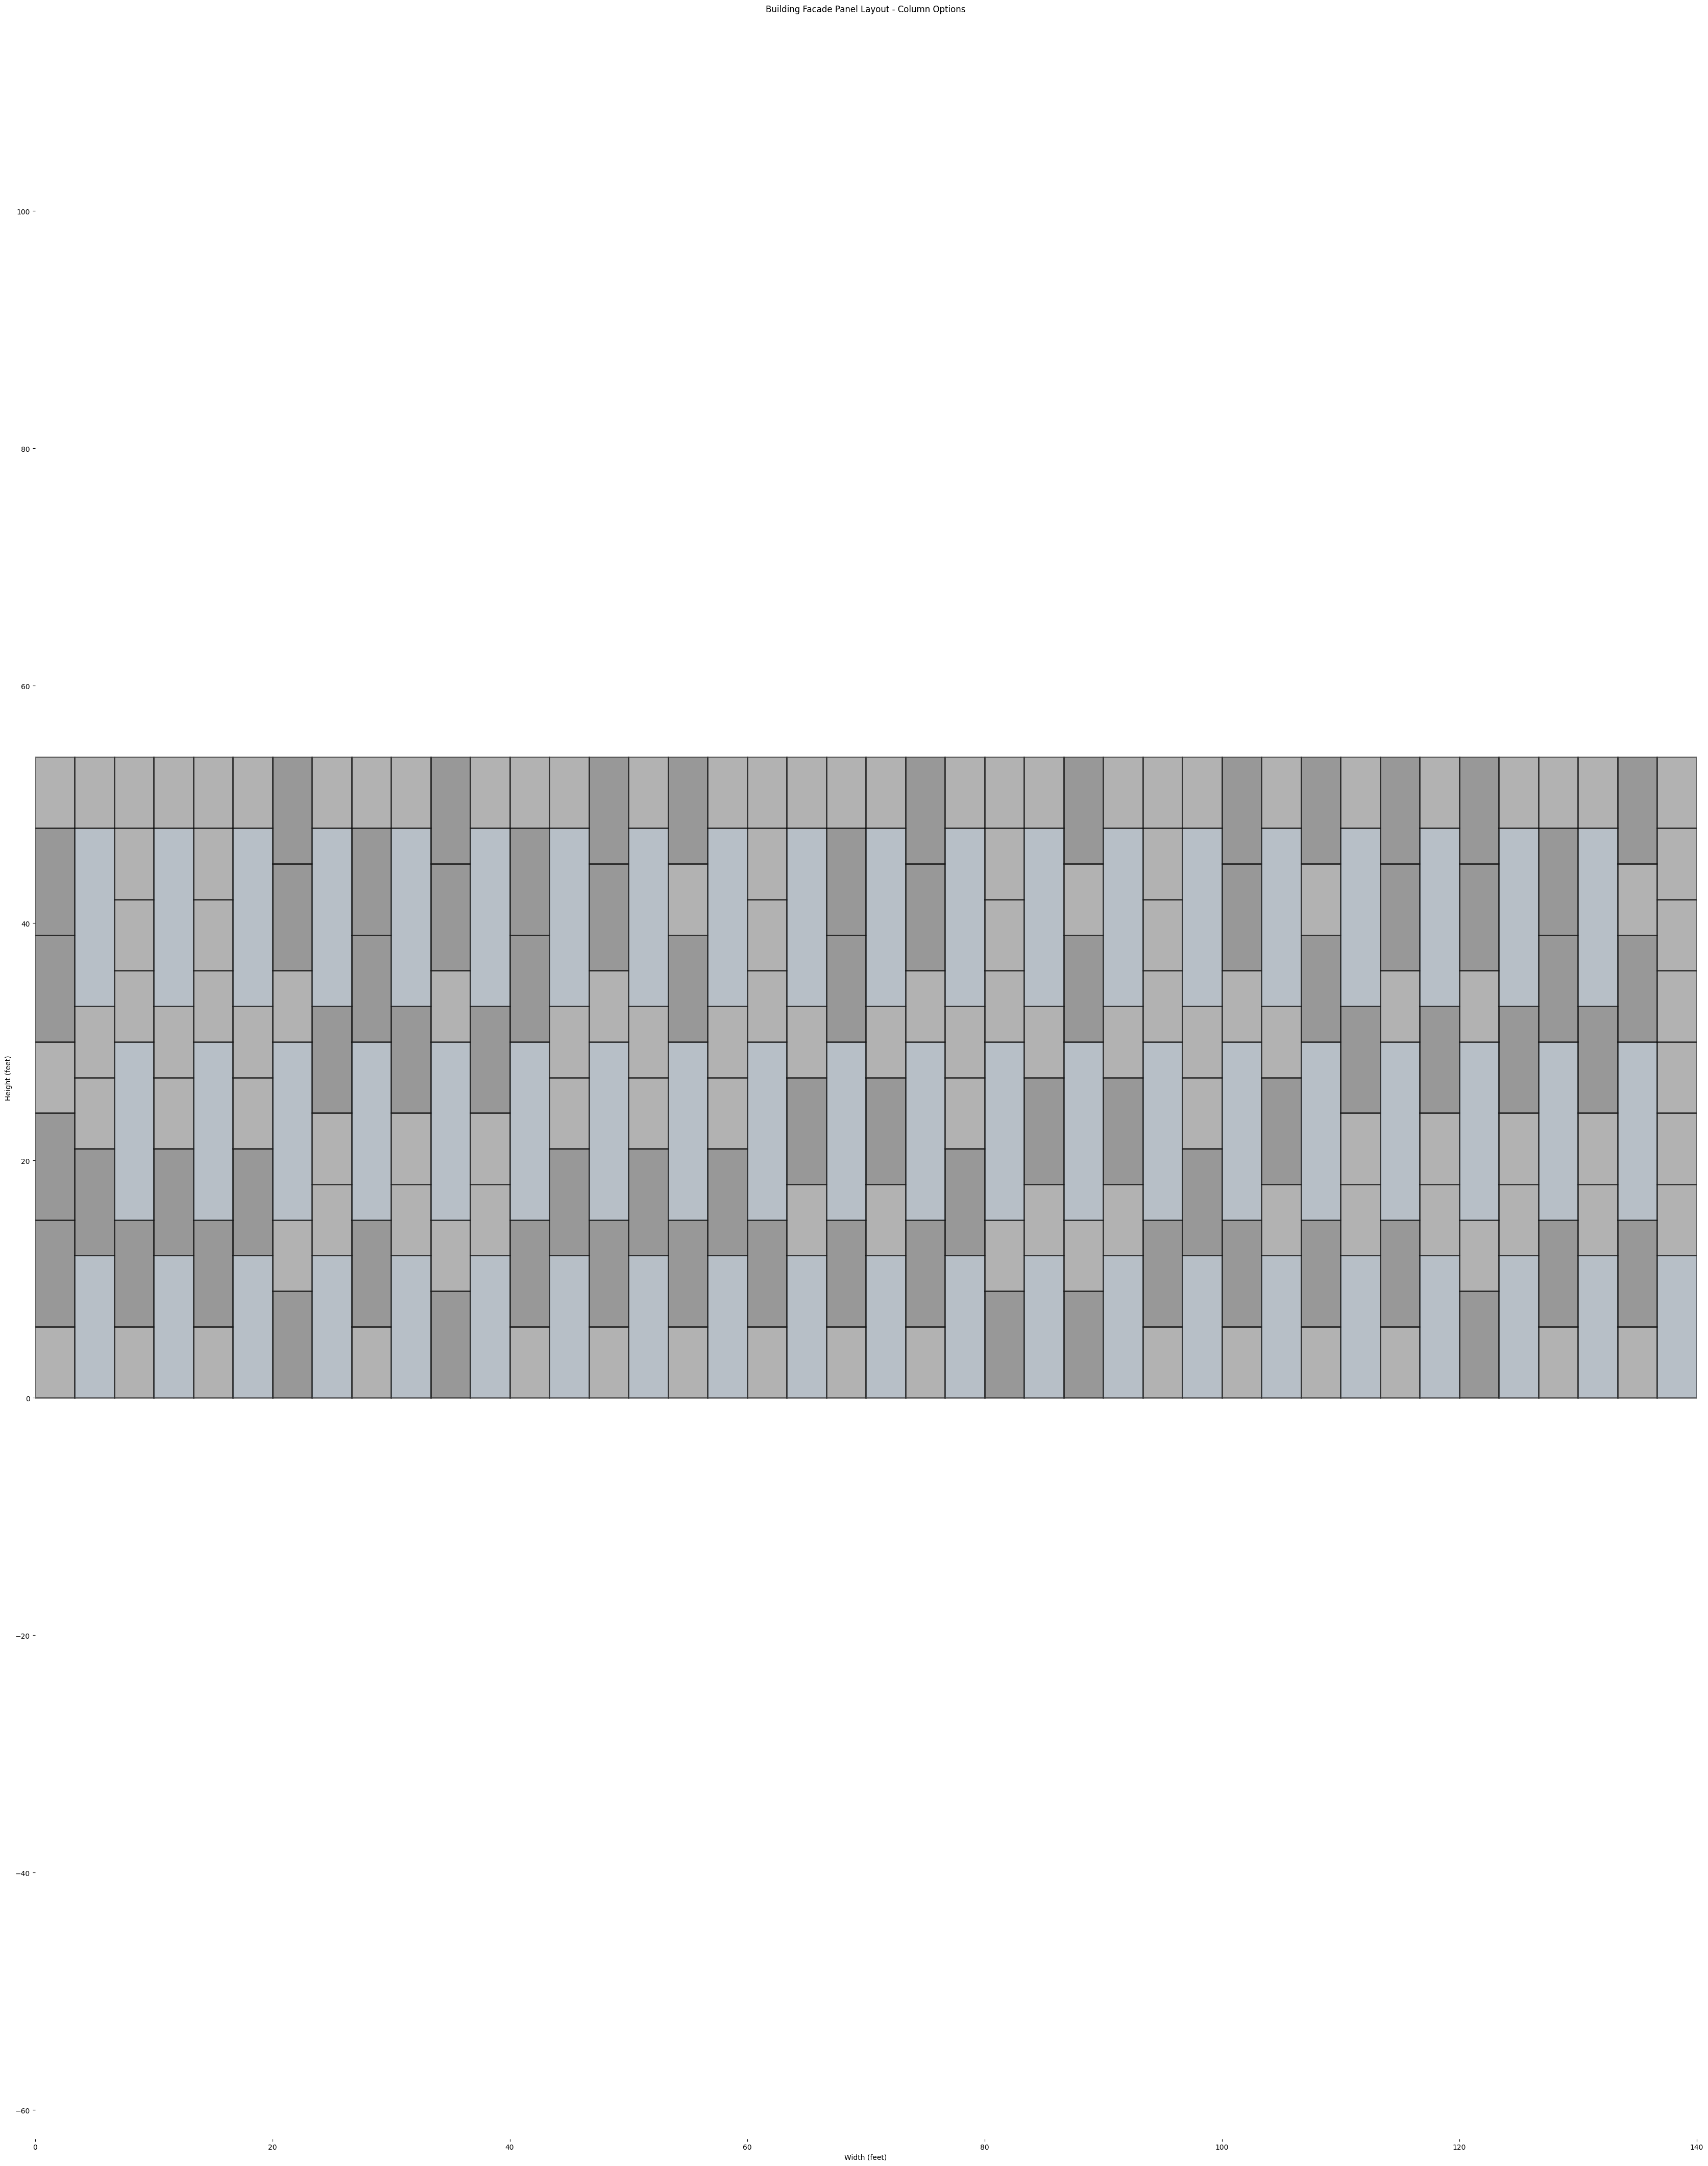

In [512]:
# panel layout type B

import random

# Bay options
# vertical_bay_window_1 # Options with a window on level 1
# vertical_bay_window_1_3 # Options with a window on level 1 and 3
# vertical_bay_window_2 # Options with windows on levels 2
# vertical_bay_solid # Options with all solid panels


# Create facade layout
facade_layout_B = []

facade_layout_B.append(random.choice(vertical_bay_solid))
for i in range(20):
    facade_layout_B.append(random.choice(vertical_bay_window_1_3))
    facade_layout_B.append(random.choice(vertical_bay_window_2))
facade_layout_B.append(vertical_bay_window_1[0])


print(len(facade_layout_B))
print(facade_layout_B)
print("")
plot_panel_col_layout(facade_layout_B)

42
[(12, 6, 9, 9, 9, 9), (9, 6, 15, 9, 6, 9), (12, 6, 6, 6, 9, 9, 6), (6, 6, 6, 6, 9, 15, 6), (12, 3, 15, 6, 9, 9), (6, 9, 6, 6, 6, 15, 6), (12, 6, 6, 9, 6, 9, 6), (6, 9, 15, 3, 15, 6), (12, 9, 6, 6, 15, 6), (9, 6, 15, 6, 6, 6, 6), (12, 3, 15, 6, 6, 6, 6), (6, 9, 9, 9, 15, 6), (12, 9, 9, 6, 6, 6, 6), (9, 6, 15, 3, 15, 6), (12, 6, 6, 9, 15, 6), (9, 6, 15, 6, 6, 6, 6), (12, 3, 15, 9, 9, 6), (6, 9, 9, 9, 15, 6), (12, 9, 9, 6, 9, 9), (6, 9, 15, 3, 15, 6), (12, 9, 6, 6, 15, 6), (9, 6, 15, 6, 6, 6, 6), (12, 3, 15, 6, 9, 9), (6, 6, 6, 9, 6, 15, 6), (12, 6, 9, 6, 6, 9, 6), (9, 6, 15, 3, 15, 6), (12, 9, 6, 6, 15, 6), (9, 6, 15, 9, 6, 9), (12, 3, 15, 6, 6, 6, 6), (6, 6, 6, 6, 9, 15, 6), (12, 6, 9, 6, 9, 6, 6), (9, 6, 15, 3, 15, 6), (12, 6, 6, 9, 15, 6), (9, 6, 15, 9, 9, 6), (12, 3, 15, 6, 9, 9), (9, 9, 6, 9, 15, 6), (12, 9, 6, 6, 6, 9, 6), (6, 9, 15, 3, 15, 6), (12, 9, 6, 6, 15, 6), (6, 9, 15, 9, 9, 6), (12, 6, 9, 6, 6, 9, 6), (9, 9, 6, 9, 9, 6, 6)]



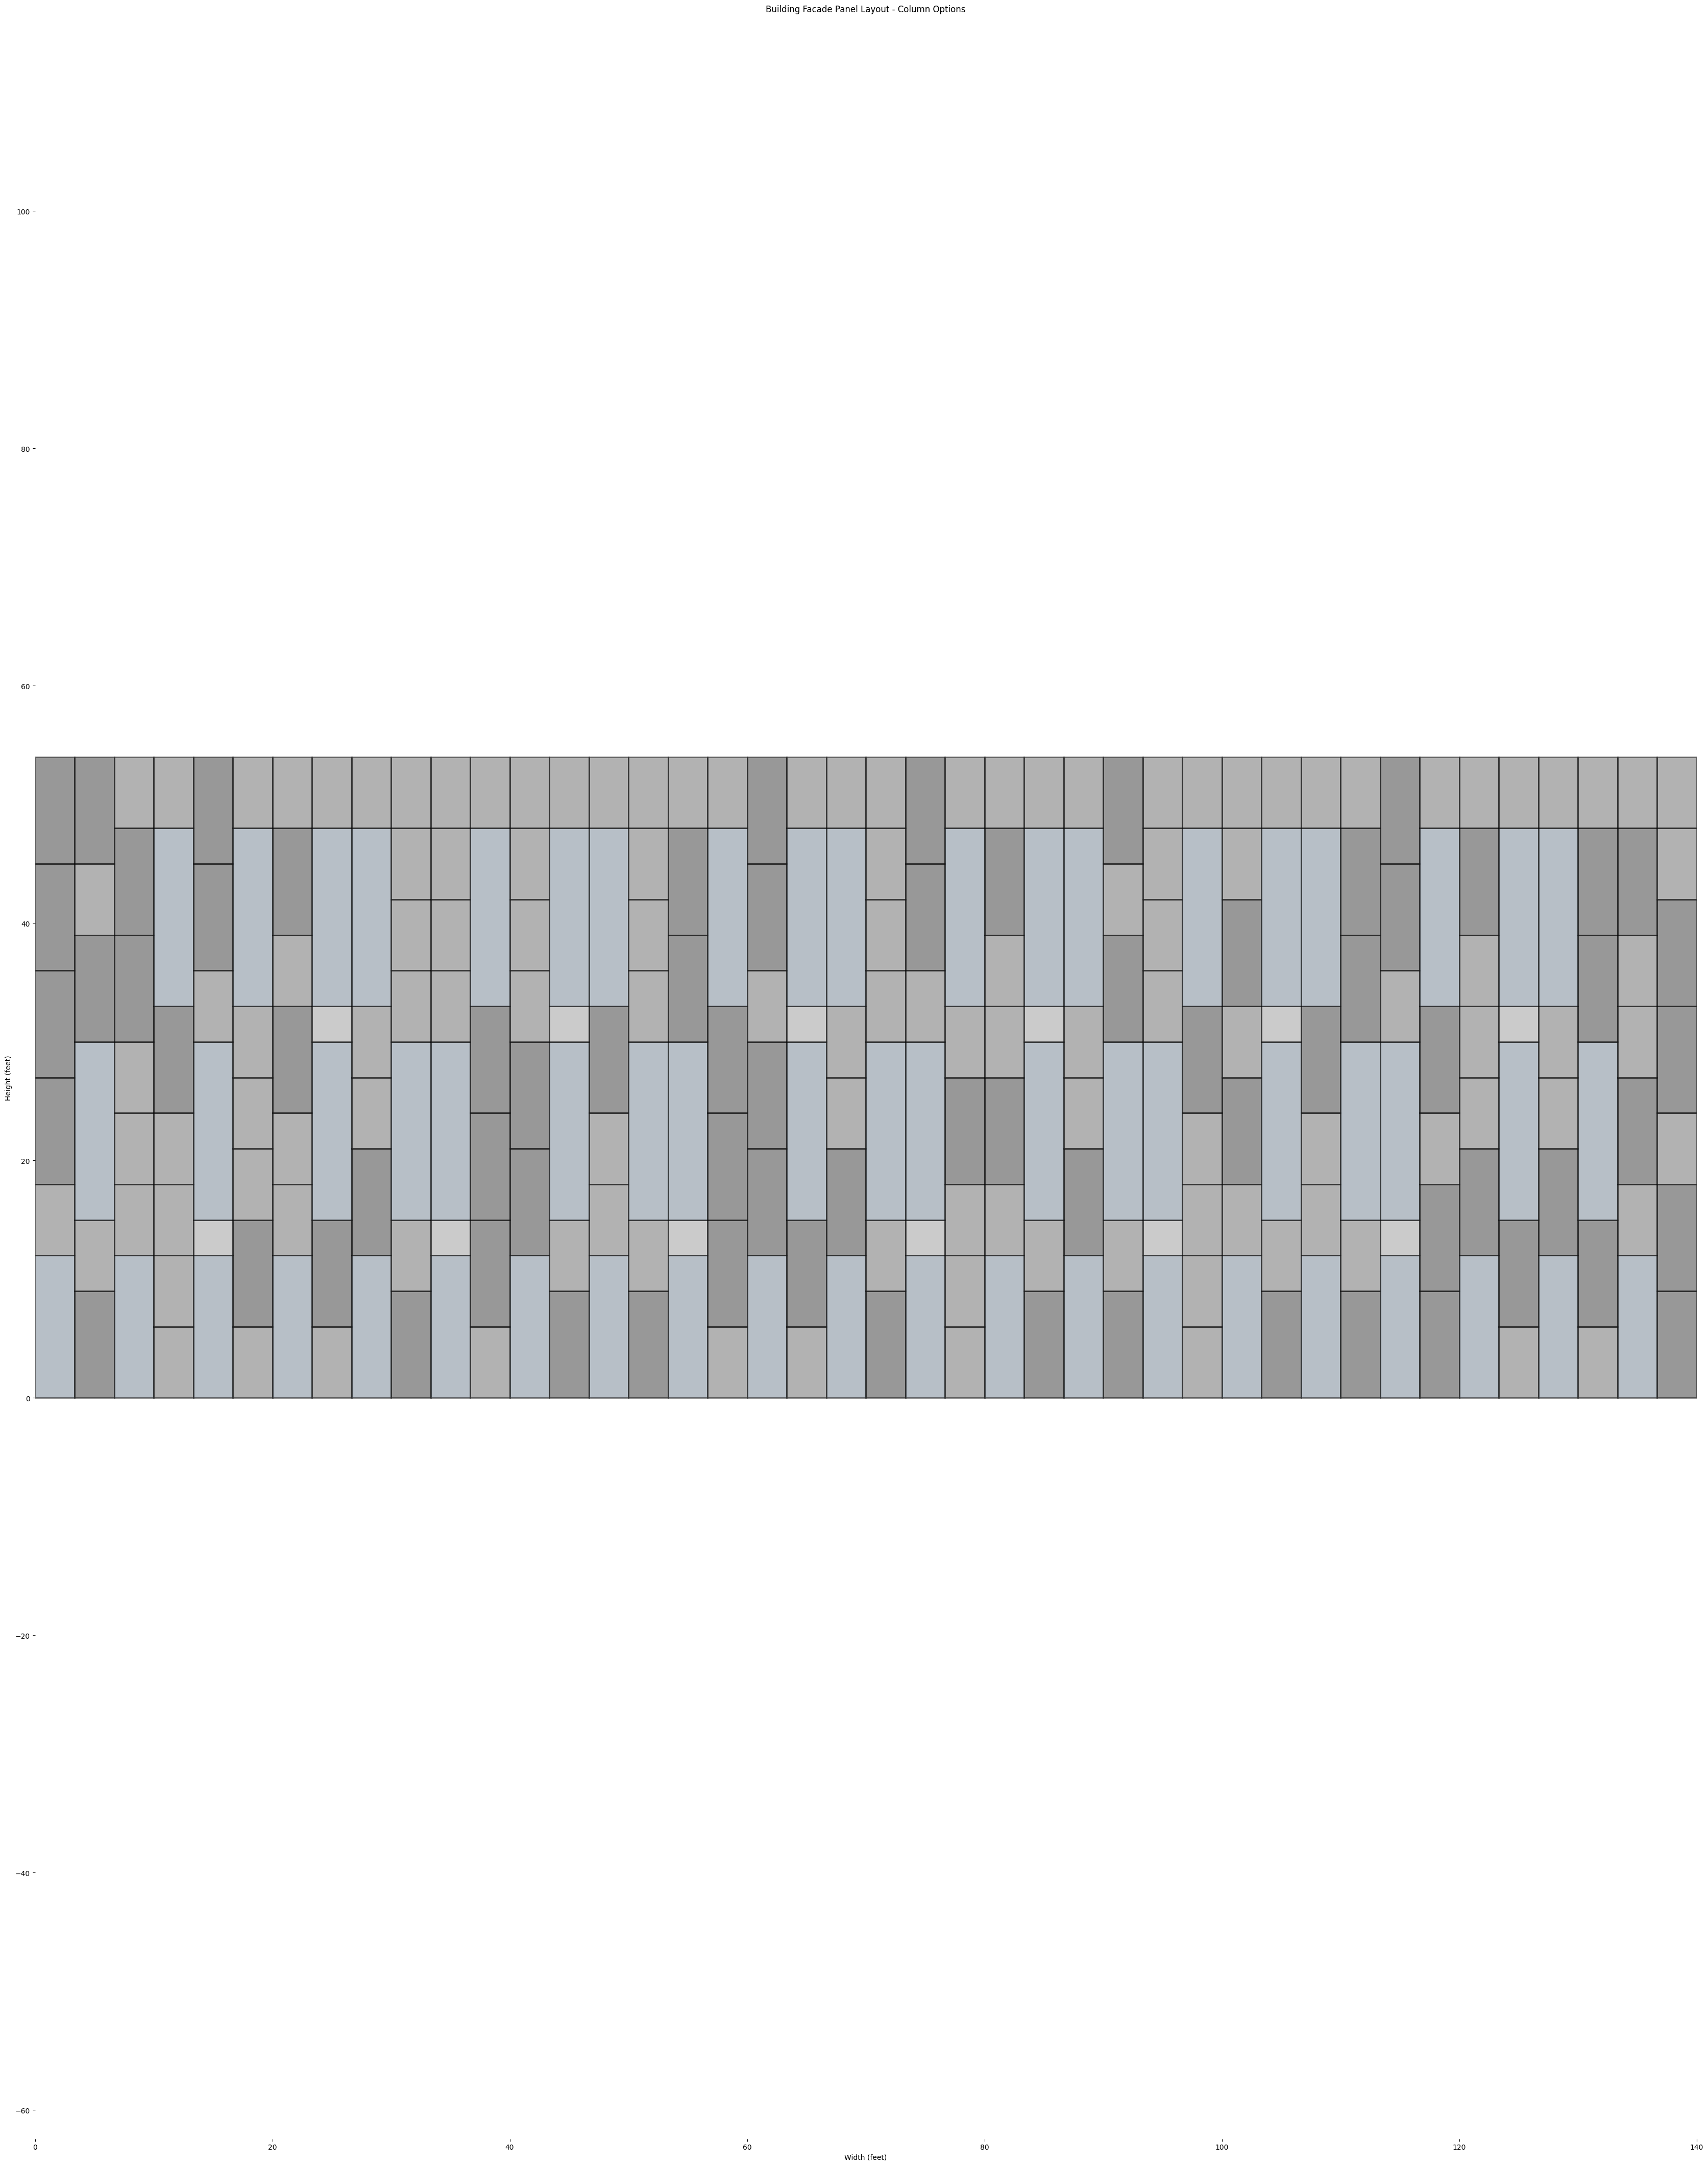

In [513]:
# panel layout type c

import random

# Bay options
# vertical_bay_window_1
# vertical_bay_window_2
# vertical_bay_window_3
# vertical_bay_window_1_2
# vertical_bay_window_1_3
# vertical_bay_window_2_3
# vertical_bay_window_1_2_3
# vertical_bay_solid

# Create facade layout
facade_layout_C = []

facade_layout_C.append(random.choice(vertical_bay_window_1))
facade_layout_C.append(random.choice(vertical_bay_window_2))
facade_layout_C.append(random.choice(vertical_bay_window_1))
facade_layout_C.append(random.choice(vertical_bay_window_3))
for i in range(6):
    facade_layout_C.append(random.choice(vertical_bay_window_1_2))
    facade_layout_C.append(random.choice(vertical_bay_window_3))
    facade_layout_C.append(random.choice(vertical_bay_window_1))
    facade_layout_C.append(random.choice(vertical_bay_window_2_3))
    facade_layout_C.append(random.choice(vertical_bay_window_1_3))
    facade_layout_C.append(random.choice(vertical_bay_window_2))
facade_layout_C.append(random.choice(vertical_bay_window_1))
facade_layout_C.append(random.choice(vertical_bay_solid))


print(len(facade_layout_C))
print(facade_layout_C)
print("")
plot_panel_col_layout(facade_layout_C)

42
[(6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 9, 9, 6), (12, 3, 15, 3, 15, 6), (6, 6, 6, 6, 6, 

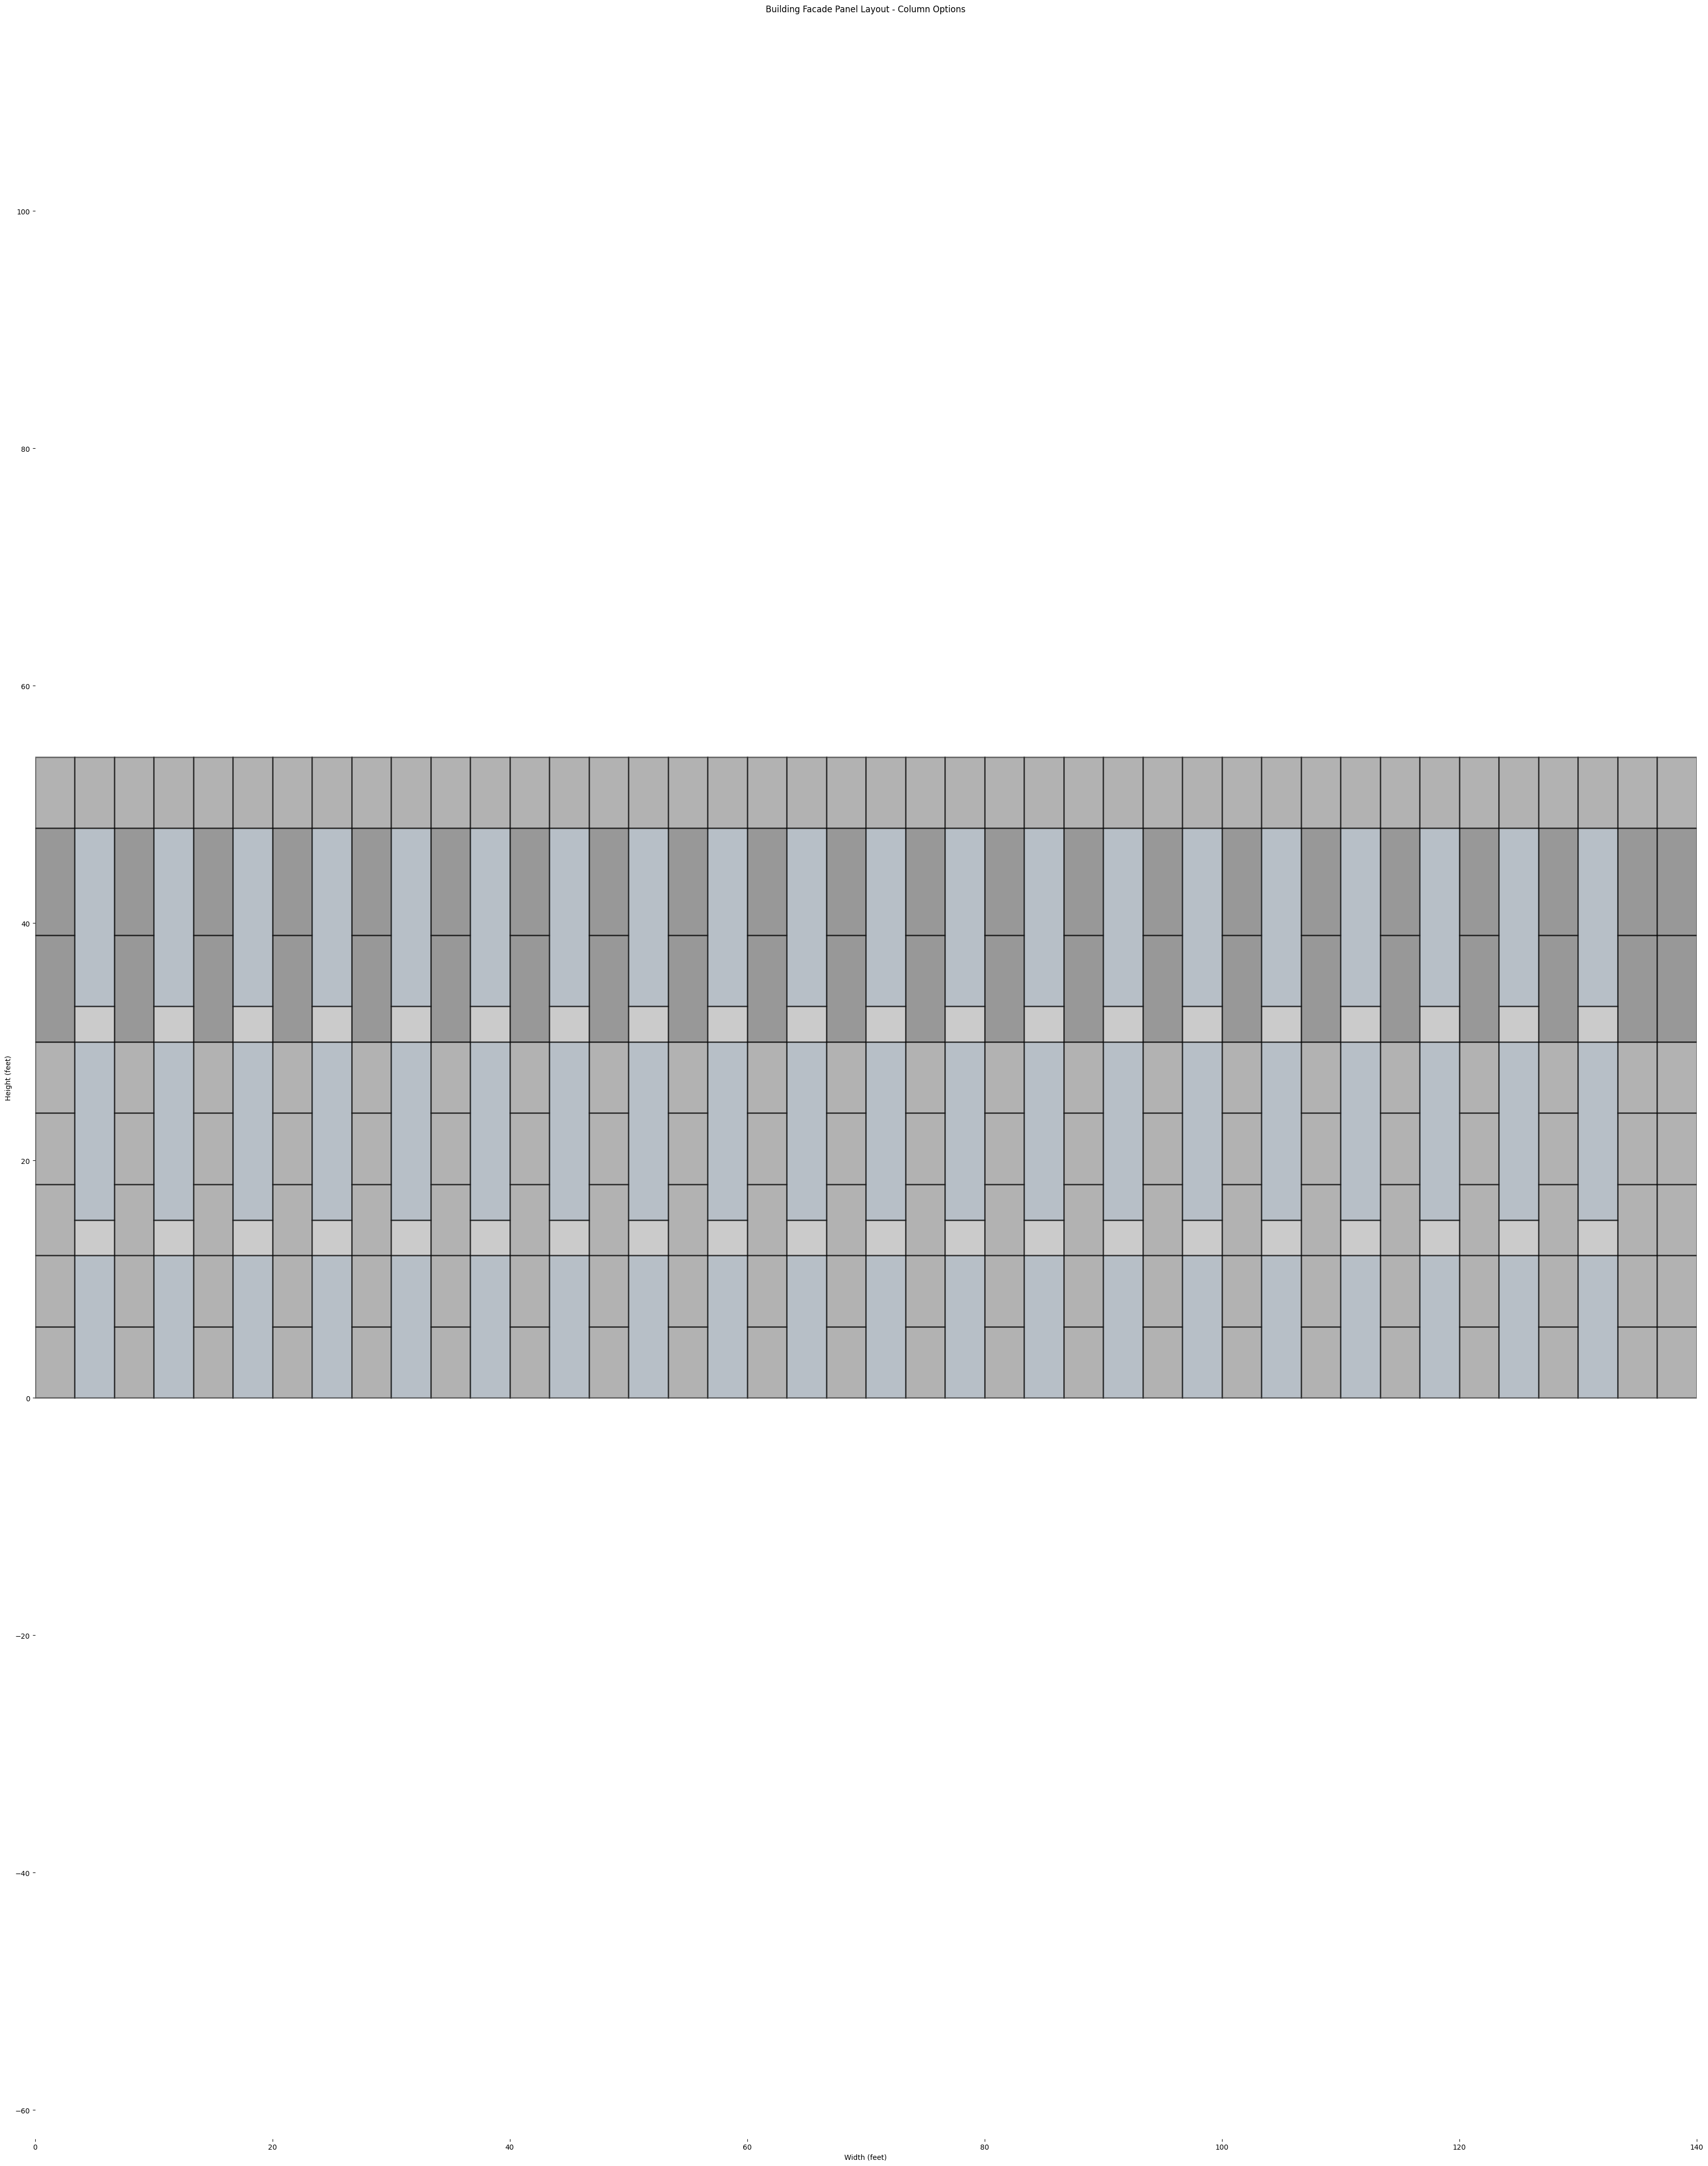

In [514]:
# panel layout option d - 2-bay module option

# Specified heights to remove
remove_heights = {12, 15, 30, 33, 48}

# Function to check if a layout contains any of the remove_heights (not used)
def contains_remove_heights(layout):
    cumulative_height = 0
    for height in layout:
        cumulative_height += height
        if cumulative_height == 12:
            return True
        if cumulative_height == 15:
            return True
        if cumulative_height == 30:
            return True
        if cumulative_height == 33:
            return True
        if cumulative_height == 48:
            return True
    return False

# # Filter the panel layouts
# filtered_vertical_bay_solid = [layout for layout in vertical_bay_solid if not contains_remove_heights(layout)]
# print(filtered_vertical_bay_solid)

# Bay options
# vertical_bay_window_1
# vertical_bay_window_2
# vertical_bay_window_3
# vertical_bay_window_1_2
# vertical_bay_window_1_3
# vertical_bay_window_2_3
# vertical_bay_window_1_2_3
# vertical_bay_solid

facade_layout_d = []

selected_vertical_bay_solid = random.choice(vertical_bay_solid)
facade_layout_d.append(selected_vertical_bay_solid)
for i in range(20):
    facade_layout_d.append(vertical_bay_window_1_2_3[0])
    facade_layout_d.append(selected_vertical_bay_solid)
facade_layout_d.append(selected_vertical_bay_solid)


print(len(facade_layout_d))
print(facade_layout_d)
print("")
plot_panel_col_layout(facade_layout_d)

42
[(6, 6, 6, 6, 6, 6, 6, 6, 6), (12, 3, 15, 9, 9, 6), (9, 6, 9, 9, 15, 6), (12, 6, 6, 6, 9, 6, 9), (6, 9, 15, 3, 15, 6), (12, 6, 6, 6, 9, 6, 9), (6, 9, 15, 3, 15, 6), (6, 9, 15, 9, 6, 9), (12, 6, 6, 9, 15, 6), (12, 3, 15, 3, 15, 6), (9, 9, 9, 9, 9, 9), (12, 6, 6, 6, 9, 6, 9), (6, 9, 15, 3, 15, 6), (12, 3, 15, 9, 9, 6), (9, 6, 9, 9, 15, 6), (12, 3, 15, 9, 9, 6), (9, 6, 9, 9, 15, 6), (12, 6, 6, 6, 9, 6, 9), (6, 9, 15, 3, 15, 6), (12, 6, 6, 6, 9, 6, 9), (6, 9, 15, 3, 15, 6), (12, 3, 15, 9, 9, 6), (9, 6, 9, 9, 15, 6), (12, 3, 15, 9, 9, 6), (9, 6, 9, 9, 15, 6), (12, 3, 15, 9, 9, 6), (9, 6, 9, 9, 15, 6), (12, 6, 6, 6, 9, 6, 9), (6, 9, 15, 3, 15, 6), (6, 9, 15, 9, 6, 9), (12, 6, 6, 9, 15, 6), (12, 3, 15, 3, 15, 6), (9, 9, 9, 9, 9, 9), (12, 3, 15, 9, 9, 6), (9, 6, 9, 9, 15, 6), (12, 6, 6, 6, 9, 6, 9), (6, 9, 15, 3, 15, 6), (12, 6, 6, 6, 9, 6, 9), (6, 9, 15, 3, 15, 6), (12, 3, 15, 3, 15, 6), (9, 9, 9, 9, 9, 9), (6, 6, 6, 6, 6, 6, 6, 6, 6)]



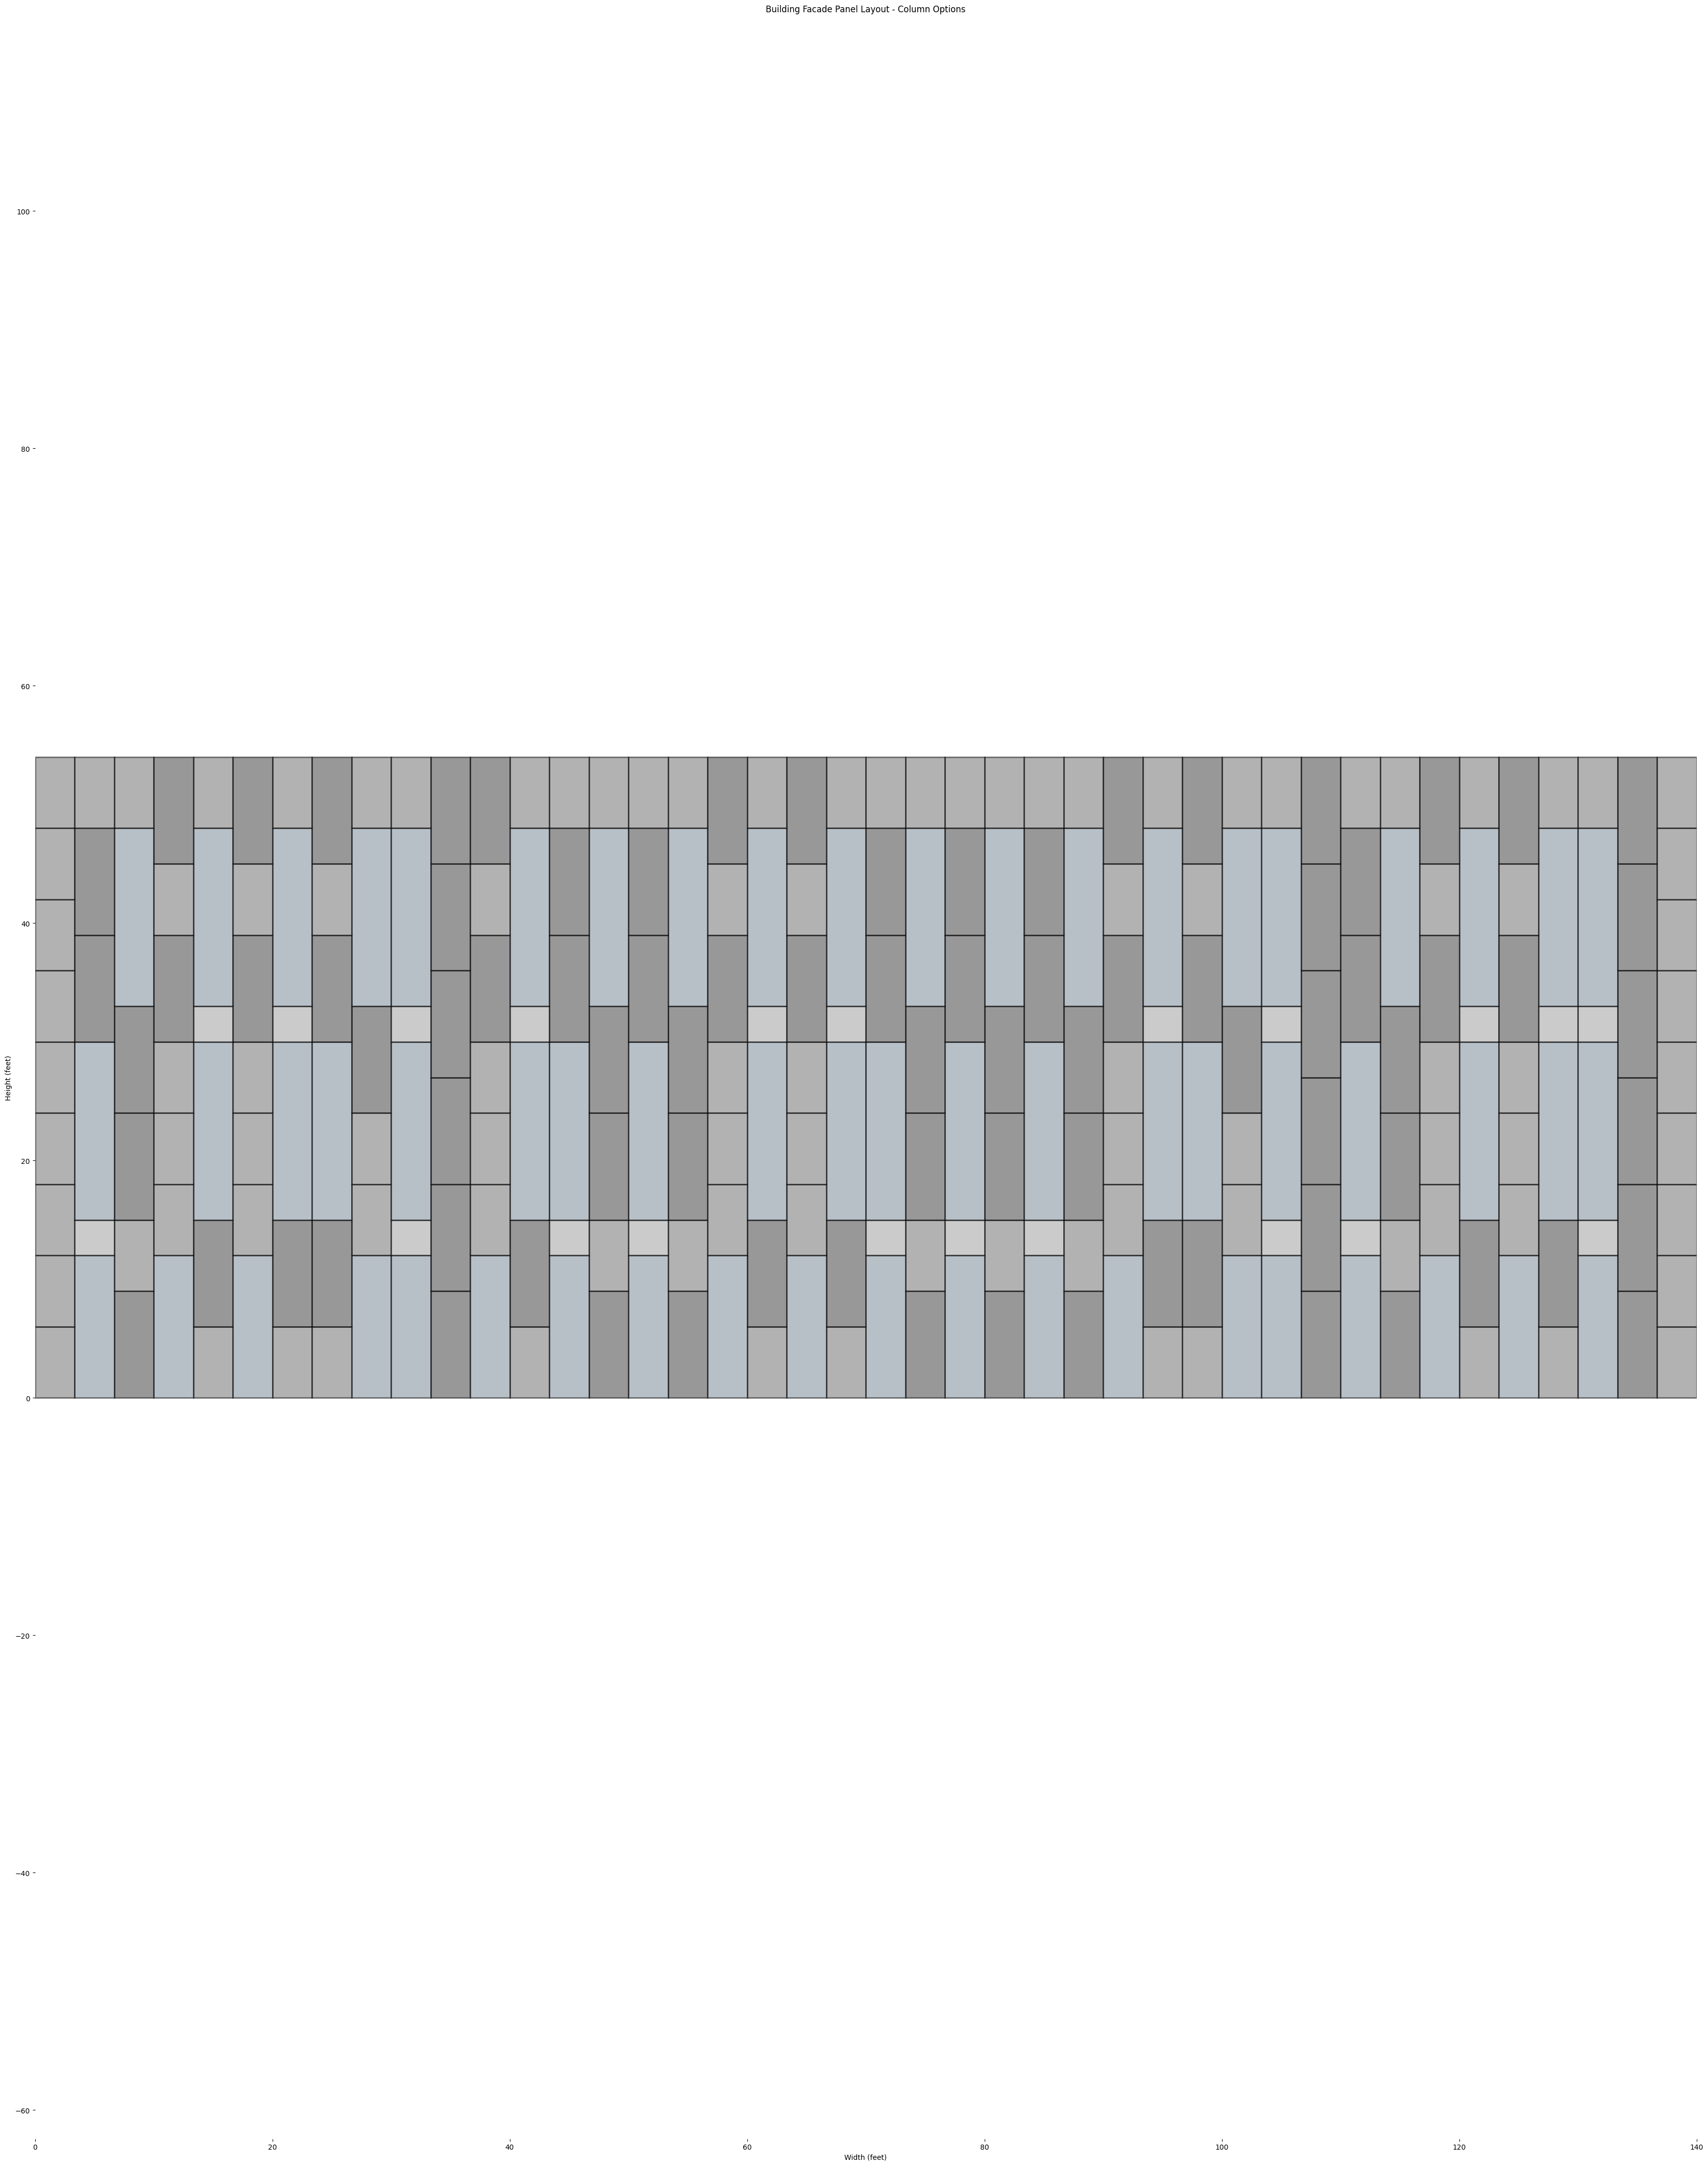

In [515]:
# panel layout option e - 2-bay module alt option

# Specified heights to remove
remove_heights = {12, 15, 30, 33, 48}

# # Filter the panel layouts
# filtered_vertical_bay_solid = [layout for layout in vertical_bay_solid if not contains_remove_heights(layout)]
# print(filtered_vertical_bay_solid)

# Bay options
# vertical_bay_window_1
# vertical_bay_window_2
# vertical_bay_window_3
# vertical_bay_window_1_2
# vertical_bay_window_1_3
# vertical_bay_window_2_3
# vertical_bay_window_1_2_3
# vertical_bay_solid

# four 2-bay module options
module_option_2_bay = [
    [random.choice(vertical_bay_window_1_2_3),
    random.choice(vertical_bay_solid)],
    [random.choice(vertical_bay_window_1),
    random.choice(vertical_bay_window_2_3)],
    [random.choice(vertical_bay_window_2),
    random.choice(vertical_bay_window_1_3)],
    [random.choice(vertical_bay_window_1_2),
    random.choice(vertical_bay_window_3)]
    ]
facade_layout_e = []

selected_vertical_bay_solid = random.choice(vertical_bay_solid)
facade_layout_e.append(selected_vertical_bay_solid)
for i in range(20):
    selected_2_bay_option = random.choice(module_option_2_bay)
    for vbay in selected_2_bay_option:
        facade_layout_e.append(vbay)
facade_layout_e.append(selected_vertical_bay_solid)


print(len(facade_layout_e))
print(facade_layout_e)
print("")
plot_panel_col_layout(facade_layout_e)